# Assignment: Credit EDA Case Study
#Students: 

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the csv files
app_data = pd.read_csv('application_data.csv')
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
print('Size: ')
print(app_data.shape)

Size: 
(307511, 122)


In [5]:
#Checking the count of missing values
for column in app_data:
    if app_data[column].isna().any():
        print('{0} has {1} missing values'.format(column, app_data[column].isna().sum()))

AMT_ANNUITY has 12 missing values
AMT_GOODS_PRICE has 278 missing values
NAME_TYPE_SUITE has 1292 missing values
OWN_CAR_AGE has 202929 missing values
OCCUPATION_TYPE has 96391 missing values
CNT_FAM_MEMBERS has 2 missing values
EXT_SOURCE_1 has 173378 missing values
EXT_SOURCE_2 has 660 missing values
EXT_SOURCE_3 has 60965 missing values
APARTMENTS_AVG has 156061 missing values
BASEMENTAREA_AVG has 179943 missing values
YEARS_BEGINEXPLUATATION_AVG has 150007 missing values
YEARS_BUILD_AVG has 204488 missing values
COMMONAREA_AVG has 214865 missing values
ELEVATORS_AVG has 163891 missing values
ENTRANCES_AVG has 154828 missing values
FLOORSMAX_AVG has 153020 missing values
FLOORSMIN_AVG has 208642 missing values
LANDAREA_AVG has 182590 missing values
LIVINGAPARTMENTS_AVG has 210199 missing values
LIVINGAREA_AVG has 154350 missing values
NONLIVINGAPARTMENTS_AVG has 213514 missing values
NONLIVINGAREA_AVG has 169682 missing values
APARTMENTS_MODE has 156061 missing values
BASEMENTAREA_M

In [6]:
#Checking the statistics of the dataframe
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [7]:
#Display Columns of the data frame

app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
#Checking the length of the DF
len(app_data)

307511

In [9]:
#sorting 
app_data.isna().sum().sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [10]:
app_data.shape

(307511, 122)

In [11]:
# There are columns which has more than 50% missing values
#Variable x will be used for droping the columns which has more than 50% of missing values
x = len(app_data)/2
x

153755.5

In [12]:
# Check the columns which has less than 50% of missing values
app_data.columns[app_data.isnull().sum() < x]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [13]:
# Check how many columns are having less than 50% of missing values
len(app_data.columns[app_data.isnull().sum() < x])

81

In [14]:
# Columns with more than 50% of missing values will be removed from the dataset.
app_data = app_data[app_data.columns[app_data.isnull().sum() < x]]

In [15]:
# Let's see the size after removing the columns
app_data.shape

(307511, 81)

In [16]:
app_data.isna().sum().sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
NAME_TYPE_SUITE                   1292
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

### Numerical columns

In [17]:
app_data.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [18]:
#Categorical columns
list(set(app_data.columns) - set(app_data.describe().columns))

['EMERGENCYSTATE_MODE',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS']

In [19]:
# Store the columns with null values in a new dataframe.
nulls = app_data.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)

FLOORSMAX_MEDI                  153020
FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
NAME_TYPE_SUITE                   1292
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [20]:
#Checking the count of null values
app_data.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 81, dtype: int64

In [21]:
#Checking the percentage of missing data
data_missing = app_data.count() / len(app_data)
data_missing = (1 - data_missing)*100

In [22]:
#Rounding off to 2 decimal places
data_missing  = round(data_missing, 2)
data_missing

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 81, dtype: float64

In [23]:
data_missing.sort_values(ascending = False, inplace=True)

In [24]:
data_missing.head(50)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
NAME_TYPE_SUITE                  0.42
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_DOCUMENT_5                  0.00
NAME_FAMILY_STATUS               0.00
FLAG_EMAIL                       0.00
FLAG_PHONE  

### Treating FLOORSMAX_AVG

In [25]:
app_data['FLOORSMAX_AVG'].head() 

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [26]:
app_data['FLOORSMAX_AVG'].mean()

0.2262819070368362

In [27]:
app_data['FLOORSMAX_AVG'].median()

0.1667

In [28]:
app_data['FLOORSMAX_AVG'].mode()

0    0.1667
dtype: float64

In [29]:
app_data['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

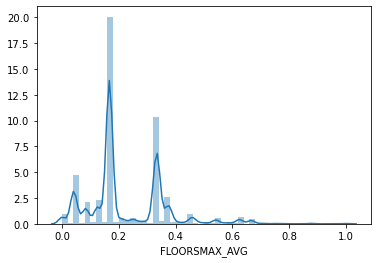

In [30]:
sns.distplot(app_data['FLOORSMAX_AVG'])
plt.show()

In [31]:
# Filling missing values with mean of the column
app_data['FLOORSMAX_AVG'].fillna(app_data['FLOORSMAX_AVG'].mean(), inplace = True)

In [32]:
#Checking if all the missed values are filled
app_data['FLOORSMAX_AVG'].isna().sum()

0

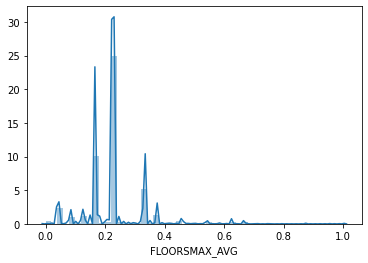

In [33]:
sns.distplot(app_data['FLOORSMAX_AVG'])
plt.show()

In [34]:
#do the same for the columns with total null values above 40%

### Treating FLOORSMAX_MEDI

In [35]:
# "FLOORSMAX_MEDI" column:
app_data['FLOORSMAX_MEDI'].head() 

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [36]:
app_data['FLOORSMAX_MEDI'].mean()

0.22589659009280993

In [37]:
app_data['FLOORSMAX_MEDI'].median()

0.1667

In [38]:
app_data['FLOORSMAX_MEDI'].mode()

0    0.1667
dtype: float64

In [39]:
app_data['FLOORSMAX_MEDI'].describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

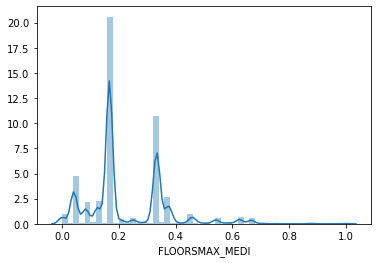

In [40]:
sns.distplot(app_data['FLOORSMAX_MEDI'])
plt.show()

In [41]:
# Filling missing values with mean of the column
app_data['FLOORSMAX_MEDI'].fillna(app_data['FLOORSMAX_MEDI'].mean(), inplace = True)

In [42]:
#Checking if all the missed values are filled
app_data['FLOORSMAX_MEDI'].isna().sum()

0

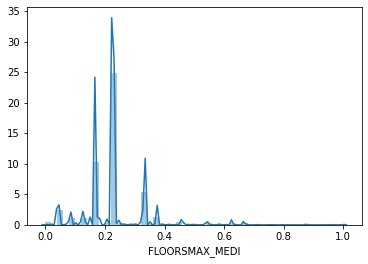

In [43]:
sns.distplot(app_data['FLOORSMAX_MEDI'])
plt.show()

In [44]:
app_data['FLOORSMAX_MEDI'].head()

0    0.083300
1    0.291700
2    0.225897
3    0.225897
4    0.225897
Name: FLOORSMAX_MEDI, dtype: float64

## Treating FLOORSMAX_MODE

In [45]:
app_data['FLOORSMAX_MODE'].head() 

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [46]:
app_data['FLOORSMAX_MODE'].mean()

0.22231504747867964

In [47]:
app_data['FLOORSMAX_MODE'].median() 

0.1667

In [48]:
app_data['FLOORSMAX_MODE'].mode()

0    0.1667
dtype: float64

In [49]:
app_data['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

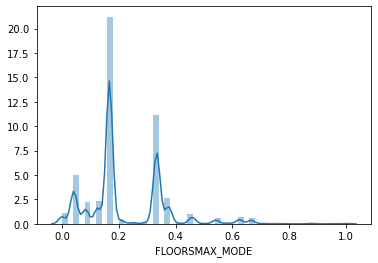

In [50]:
sns.distplot(app_data['FLOORSMAX_MODE'])
plt.show()

In [51]:
# Fill Missing values with the mean of the column
app_data['FLOORSMAX_MODE'].fillna(app_data['FLOORSMAX_MODE'].mean(), inplace = True)

In [52]:
# Checking if all the missing values are filled
app_data['FLOORSMAX_MODE'].isna().sum()

0

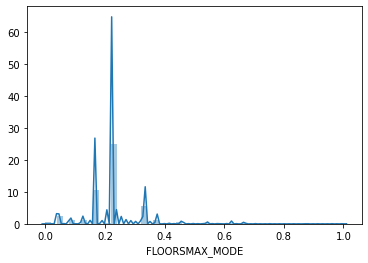

In [53]:
sns.distplot(app_data['FLOORSMAX_MODE'])
plt.show()

In [54]:
app_data['FLOORSMAX_MODE'].head()

0    0.083300
1    0.291700
2    0.222315
3    0.222315
4    0.222315
Name: FLOORSMAX_MODE, dtype: float64

### YEARS_BEGINEXPLUATATION_AVG column

In [55]:
app_data['YEARS_BEGINEXPLUATATION_AVG'].head() 

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [56]:
app_data['YEARS_BEGINEXPLUATATION_AVG'].mean()

0.9777348581622732

In [57]:
app_data['YEARS_BEGINEXPLUATATION_AVG'].median()

0.9816

In [58]:
app_data['YEARS_BEGINEXPLUATATION_AVG'].mode() 

0    0.9871
dtype: float64

In [59]:
app_data['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

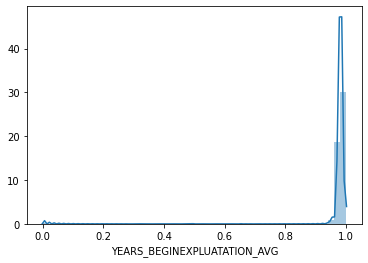

In [60]:
sns.distplot(app_data['YEARS_BEGINEXPLUATATION_AVG'])
plt.show()

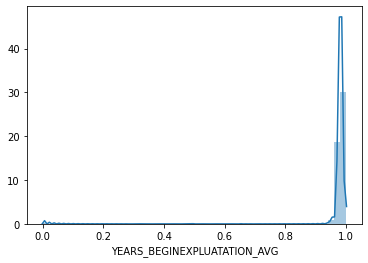

In [61]:
sns.distplot(app_data['YEARS_BEGINEXPLUATATION_AVG'])
plt.show()

In [62]:
# Fill Missing values
app_data['YEARS_BEGINEXPLUATATION_AVG'].fillna(app_data['YEARS_BEGINEXPLUATATION_AVG'].mean(), inplace = True)

In [63]:
# Check if all the missing values are filled
app_data['YEARS_BEGINEXPLUATATION_AVG'].isna().sum()

0

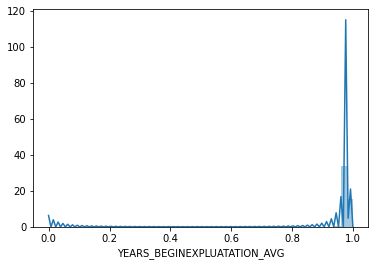

In [64]:
sns.distplot(app_data['YEARS_BEGINEXPLUATATION_AVG'])
plt.show()

In [65]:
app_data['YEARS_BEGINEXPLUATATION_AVG'].head()

0    0.972200
1    0.985100
2    0.977735
3    0.977735
4    0.977735
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

### YEARS_BEGINEXPLUATATION_MEDI column

In [66]:
app_data['YEARS_BEGINEXPLUATATION_MEDI'].head() 

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [67]:
app_data['YEARS_BEGINEXPLUATATION_MEDI'].mean()

0.9777522640694213

In [68]:
app_data['YEARS_BEGINEXPLUATATION_MEDI'].median()

0.9816

In [69]:
app_data['YEARS_BEGINEXPLUATATION_MEDI'].mode()

0    0.9871
dtype: float64

In [70]:
app_data['YEARS_BEGINEXPLUATATION_MEDI'].describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

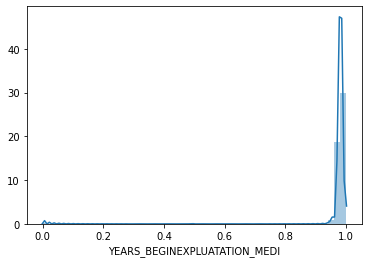

In [71]:
sns.distplot(app_data['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

In [72]:
app_data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(app_data['YEARS_BEGINEXPLUATATION_MEDI'].mean(), inplace = True)

In [73]:
app_data['YEARS_BEGINEXPLUATATION_MEDI'].isna().sum()

0

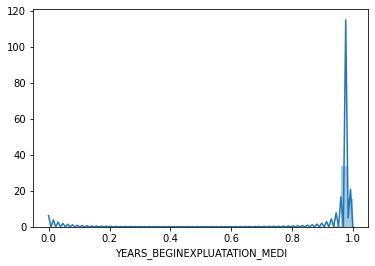

In [74]:
sns.distplot(app_data['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

In [75]:
app_data['YEARS_BEGINEXPLUATATION_MEDI'].head()

0    0.972200
1    0.985100
2    0.977752
3    0.977752
4    0.977752
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

### YEARS_BEGINEXPLUATATION_MODE column:

In [76]:
app_data['YEARS_BEGINEXPLUATATION_MODE'].head() 

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [77]:
app_data['YEARS_BEGINEXPLUATATION_MODE'].mean()

0.9770653729428284

In [78]:
app_data['YEARS_BEGINEXPLUATATION_MODE'].median()

0.9816

In [79]:
app_data['YEARS_BEGINEXPLUATATION_MODE'].mode()

0    0.9871
dtype: float64

In [80]:
app_data['YEARS_BEGINEXPLUATATION_MODE'].describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

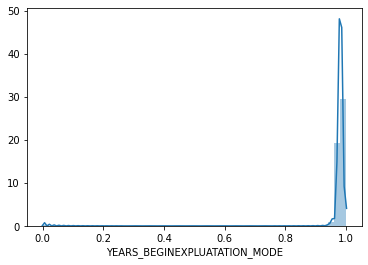

In [81]:
sns.distplot(app_data['YEARS_BEGINEXPLUATATION_MODE'])
plt.show()

In [82]:
app_data['YEARS_BEGINEXPLUATATION_MODE'].fillna(app_data['YEARS_BEGINEXPLUATATION_MODE'].mean(), inplace = True)

In [83]:
app_data['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

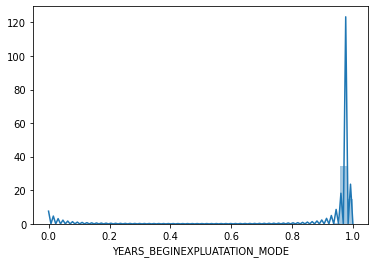

In [84]:
sns.distplot(app_data['YEARS_BEGINEXPLUATATION_MODE'])
plt.show()

In [85]:
app_data['YEARS_BEGINEXPLUATATION_MODE'].head()

0    0.972200
1    0.985100
2    0.977065
3    0.977065
4    0.977065
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

### TOTALAREA_MODE column

In [86]:
app_data['TOTALAREA_MODE'].head() 

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [87]:
app_data['TOTALAREA_MODE'].mean()

0.10254666268544003

In [88]:
app_data['TOTALAREA_MODE'].median()

0.0688

In [89]:
app_data['TOTALAREA_MODE'].mode()

0    0.0
dtype: float64

In [90]:
app_data['TOTALAREA_MODE'].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

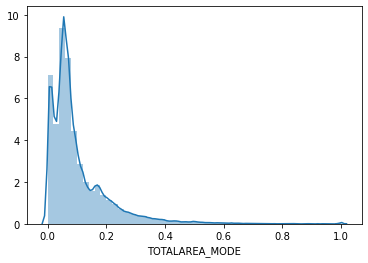

In [91]:
sns.distplot(app_data['TOTALAREA_MODE'])
plt.show()

In [92]:
app_data['TOTALAREA_MODE'].fillna(app_data['TOTALAREA_MODE'].mean(), inplace = True)

In [93]:
app_data['TOTALAREA_MODE'].isna().sum()

0

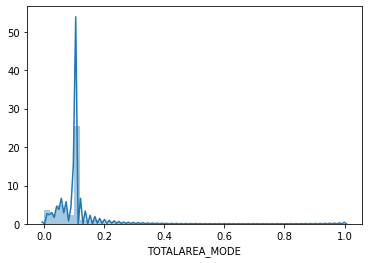

In [94]:
sns.distplot(app_data['TOTALAREA_MODE'])
plt.show()

In [95]:
app_data['TOTALAREA_MODE'].head()

0    0.014900
1    0.071400
2    0.102547
3    0.102547
4    0.102547
Name: TOTALAREA_MODE, dtype: float64

### EMERGENCYSTATE_MODE column

In [96]:
app_data['EMERGENCYSTATE_MODE'].describe()

count     161756
unique         2
top           No
freq      159428
Name: EMERGENCYSTATE_MODE, dtype: object

In [97]:
print(app_data.EMERGENCYSTATE_MODE.value_counts(normalize=True))

No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64


In [98]:
print(app_data.EMERGENCYSTATE_MODE.value_counts(normalize=False))

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64


In [99]:
print(app_data.EMERGENCYSTATE_MODE.isna().sum())

145755


In [100]:
print(app_data.EMERGENCYSTATE_MODE.count)

<bound method Series.count of 0          No
1          No
2         NaN
3         NaN
4         NaN
         ... 
307506     No
307507     No
307508     No
307509     No
307510     No
Name: EMERGENCYSTATE_MODE, Length: 307511, dtype: object>


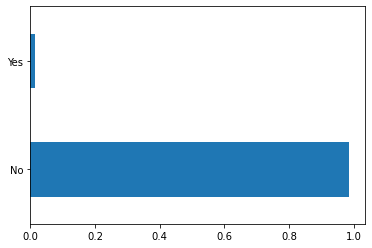

In [101]:
app_data.EMERGENCYSTATE_MODE.value_counts(normalize=True).plot.barh()
plt.show()

In [102]:
app_data.OCCUPATION_TYPE.head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

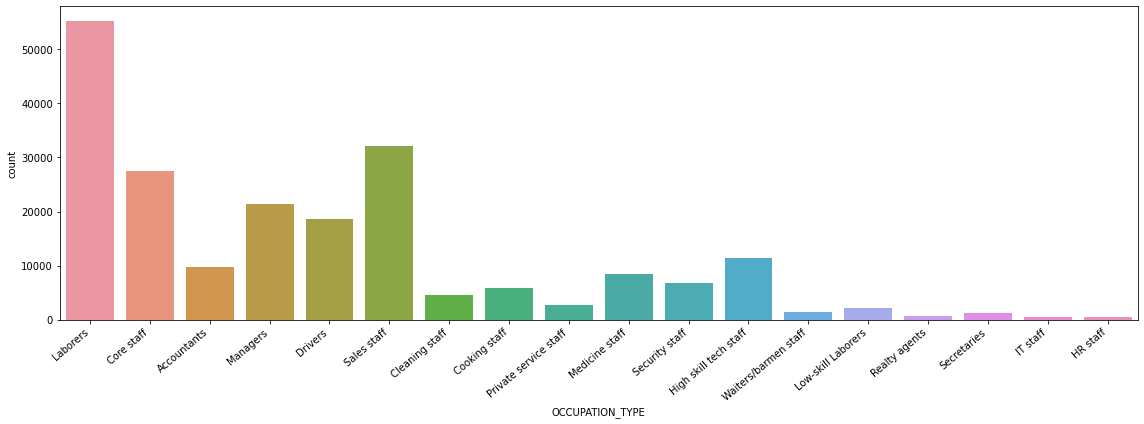

In [103]:
plt.figure(figsize=[16,6])
ax = sns.countplot(x = 'OCCUPATION_TYPE', data = app_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### EXT_SOURCE_3 column

In [104]:
app_data['EXT_SOURCE_3'].head() 

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

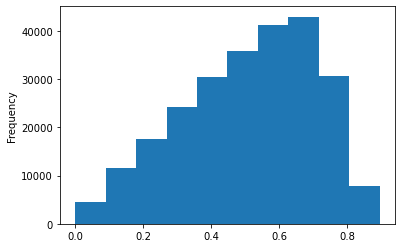

In [105]:
app_data['EXT_SOURCE_3'].plot.hist()

In [106]:
app_data['EXT_SOURCE_3'].mean()

0.5108529061800121

In [107]:
app_data['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

In [108]:
app_data['EXT_SOURCE_3'].median()

0.5352762504724826

In [109]:
app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].mean(), inplace = True)

In [110]:
# trying to convert o normal distribution

app_data['EXT_SOURCE_3'] = np.log10(app_data['EXT_SOURCE_3'])

In [111]:
app_data['EXT_SOURCE_3'].dtypes

dtype('float64')

In [112]:
app_data['EXT_SOURCE_3'].head()

0   -0.855813
1   -0.291704
2   -0.136935
3   -0.291704
4   -0.291704
Name: EXT_SOURCE_3, dtype: float64

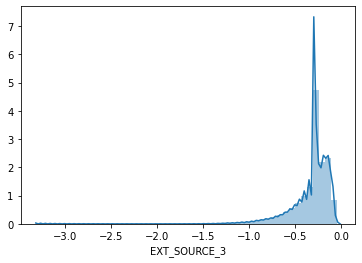

In [113]:
sns.distplot(app_data.EXT_SOURCE_3)
plt.show()

## Applying CLT to make Normal Distribution



In [114]:
samp_size = 30
app_data.EXT_SOURCE_3.sample(samp_size).mean()

-0.3372764070336553

In [115]:
app_data.EXT_SOURCE_3.sample(samp_size).mean()

-0.2881925432359422

In [116]:
sample_means = [app_data.EXT_SOURCE_3.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

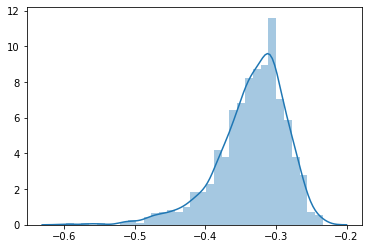

In [117]:
sns.distplot(sample_means)
plt.show()

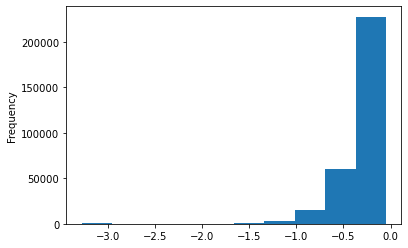

In [118]:
# Before Cpplying CLT
app_data['EXT_SOURCE_3'].plot.hist()
plt.show()

### AMT_REQ_CREDIT_BUREAU_QRT

In [119]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [120]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [121]:
unique_v = len(app_data.AMT_REQ_CREDIT_BUREAU_QRT.unique())

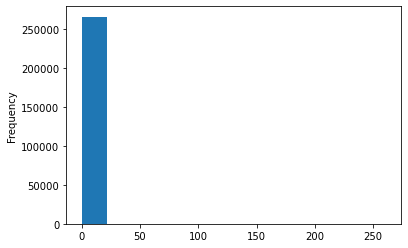

In [122]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins = unique_v)
plt.show()

In [123]:
#Categorical columns
# cols = list(set(app_data.columns) - set(app_data.describe().columns))
#app_data = app_data[cols].fillna(app_data.mode().iloc[0])
#app_data[cols].isna().sun()

In [124]:
# Numerical columns
#app_data.mean()

In [125]:
#app_data.fillna(app_data.mean(),inplace = True)

In [126]:
#app_data.isna().sum()

In [127]:
app_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [128]:
#Clients paying on time:
(app_data['TARGET'] == 0 ).sum()

282686

In [129]:
#Clients with payment dificulties:
(app_data['TARGET'] == 1 ).sum()

24825

In [130]:
# Check  if there is data imbalance in the data
# Ratio for imbalance:
(app_data['TARGET'] == 0 ).sum() / (app_data['TARGET'] == 1 ).sum()

11.387150050352467

In [131]:
sep_0 = app_data.loc[app_data['TARGET'] == 0]
sep_1 = app_data.loc[app_data['TARGET'] == 1]

### categoral columns



In [132]:
cat_cols = list(set(app_data.columns) - set(app_data.describe().columns))
cat_cols

['EMERGENCYSTATE_MODE',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS']

In [133]:
num_cols = app_data.describe().columns
num_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [134]:
len(num_cols)

68

### Univariate analisys of the categorical data

In [135]:
t_categorical = app_data.select_dtypes(include = ['object']).columns
t_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [136]:
### Function to Plot subplots
def plotting(train, sep_0, sep_1, column):
    train = train
    col = column
    
    fig = plt.figure(figsize=(10,8))
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax = ax1)
    plt.title("Plotting data from column: " + column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x = column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation = 45)
    plt.title("Plotting data in terms of total count")
    
    ax3 = plt.subplot(223)
    app_data = pd.DataFrame()
    app_data["0"] = ((sep_0[col].value_counts())/len(sep_0)) 
    app_data["1"] = ((sep_1[col].value_counts())/len(sep_1))
    app_data.plot.bar(ax = ax3)
    plt.title("PLotting the data in terms of percentage")
    
    fig.tight_layout()
    plt.show()

Plotting NAME_CONTRACT_TYPE


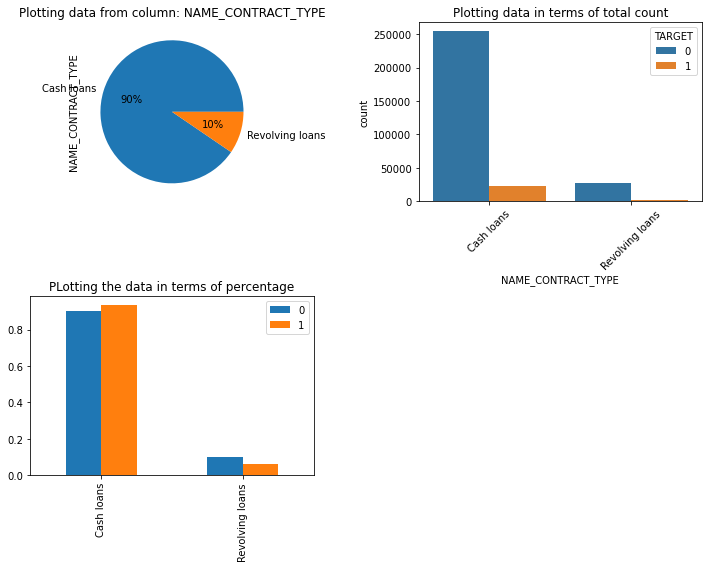

Plotting CODE_GENDER


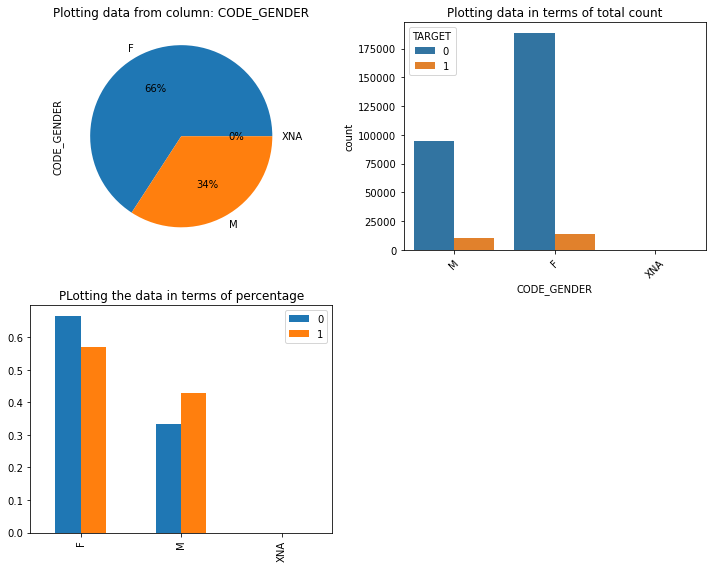

Plotting FLAG_OWN_CAR


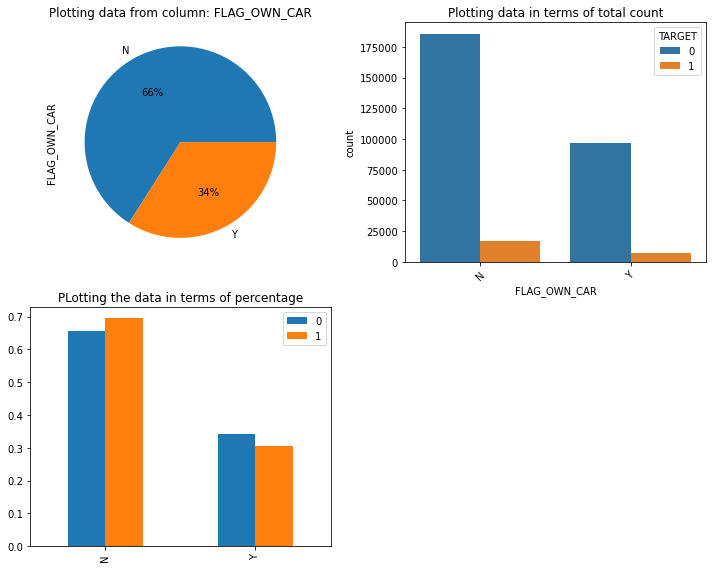

Plotting FLAG_OWN_REALTY


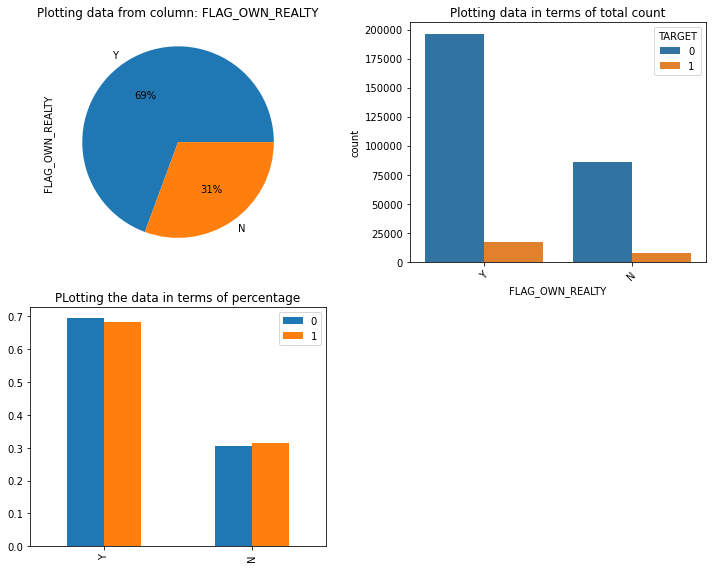

Plotting NAME_TYPE_SUITE


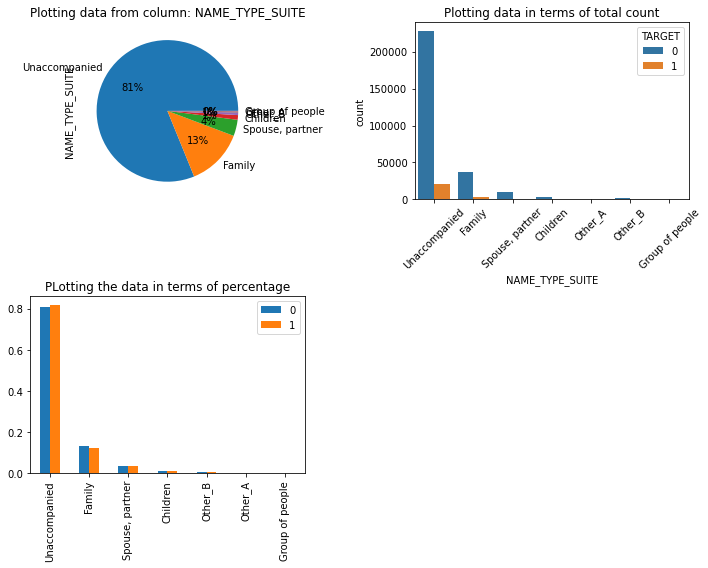

Plotting NAME_INCOME_TYPE


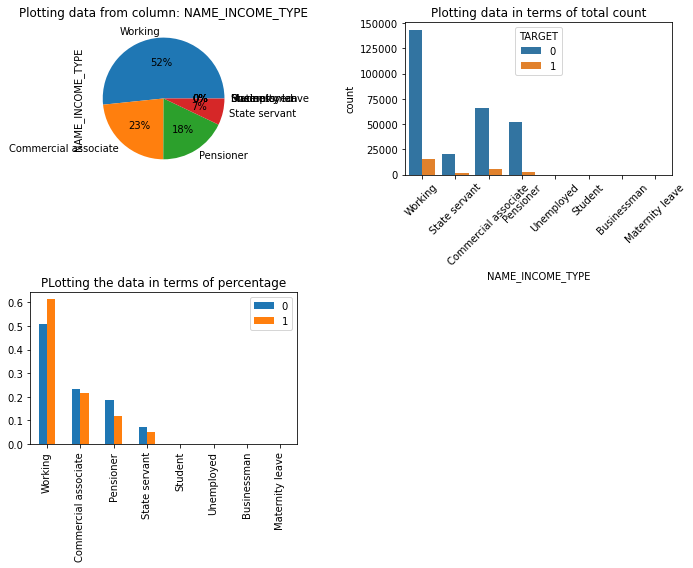

Plotting NAME_EDUCATION_TYPE


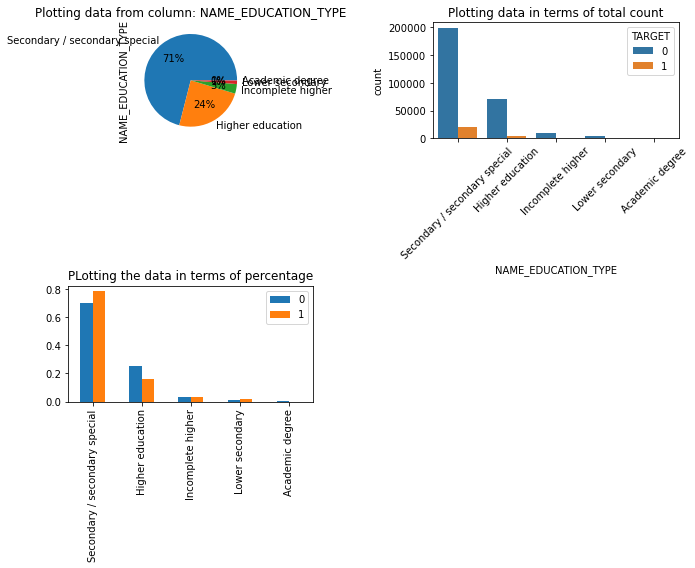

Plotting NAME_FAMILY_STATUS


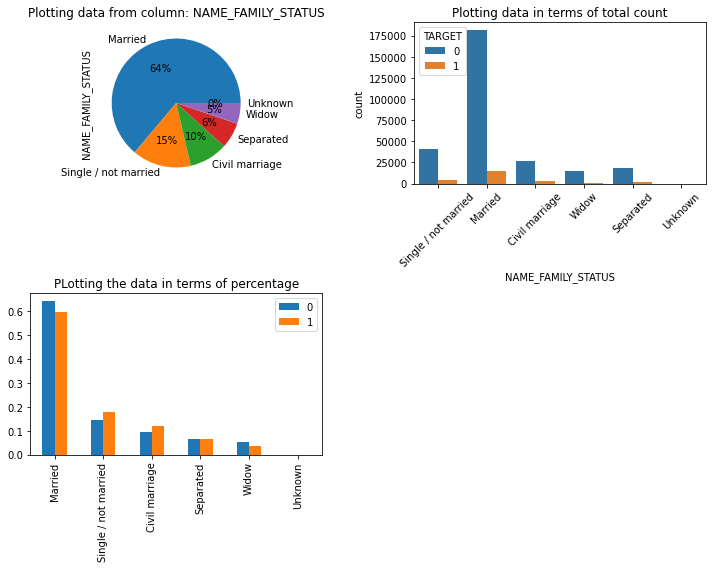

Plotting NAME_HOUSING_TYPE


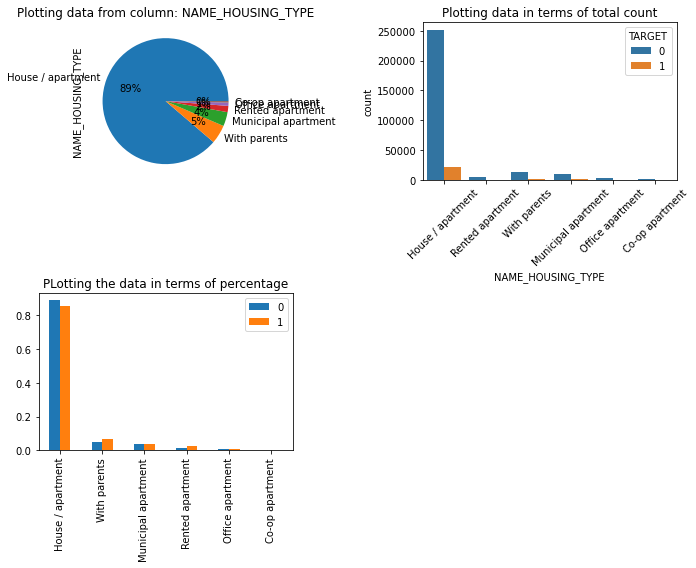

Plotting OCCUPATION_TYPE


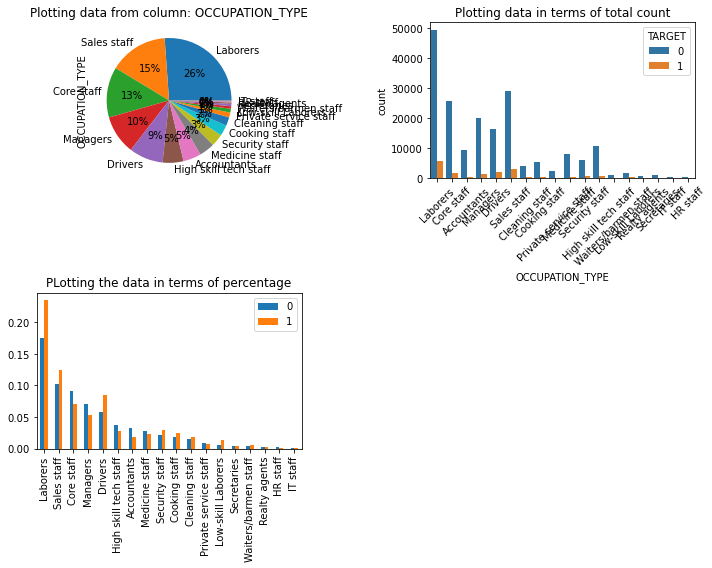

Plotting WEEKDAY_APPR_PROCESS_START


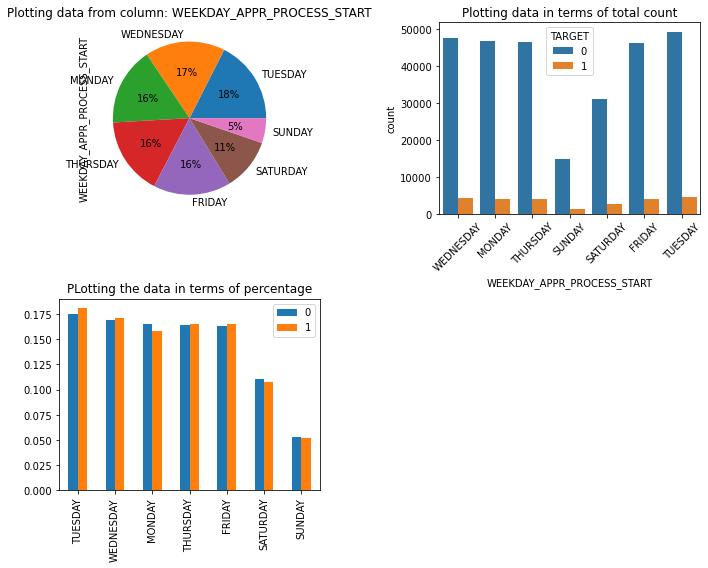

Plotting ORGANIZATION_TYPE


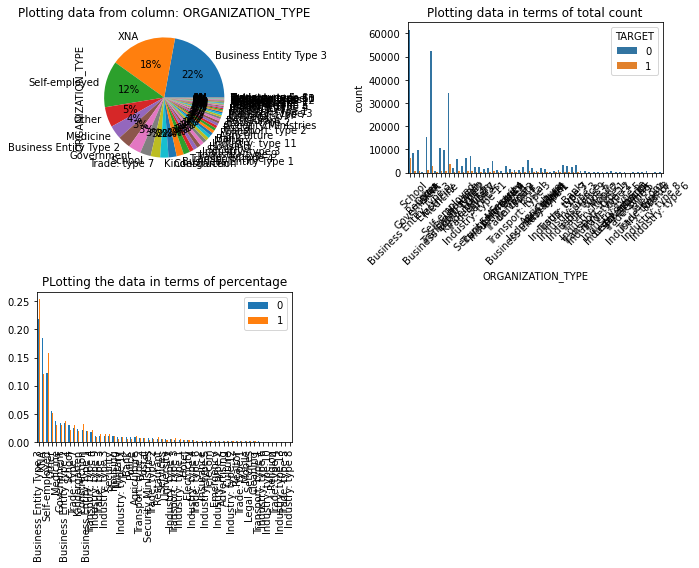

Plotting EMERGENCYSTATE_MODE


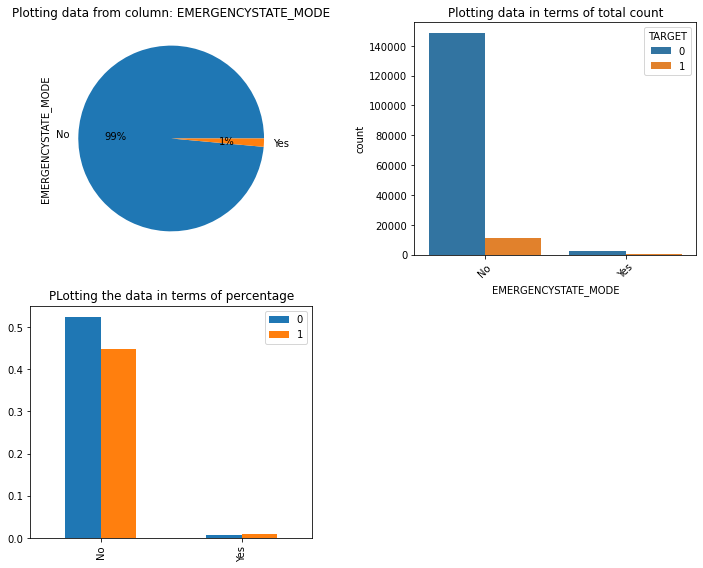

In [137]:
for column in t_categorical:
    print("Plotting", column)
    plotting(app_data, sep_0, sep_1, column)

### Numerical columns

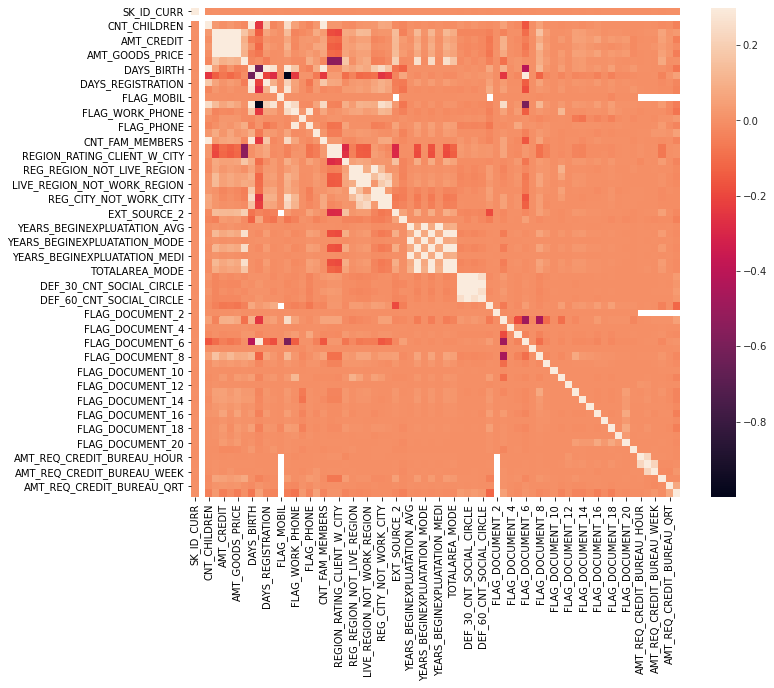

In [138]:
## Heat Map
corr = sep_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax=.3, square=True);

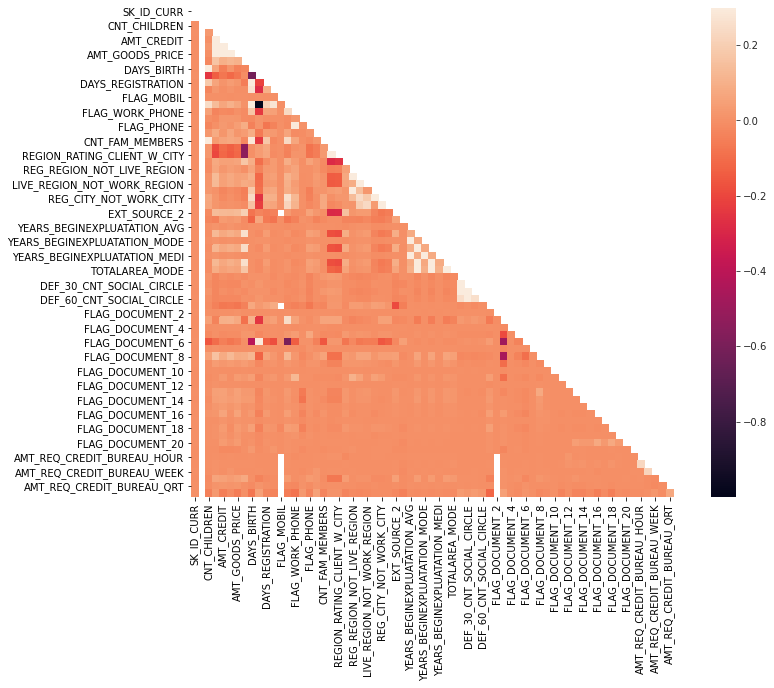

In [139]:
## Recmoving alike data by masking.
import numpy as np
corr = sep_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

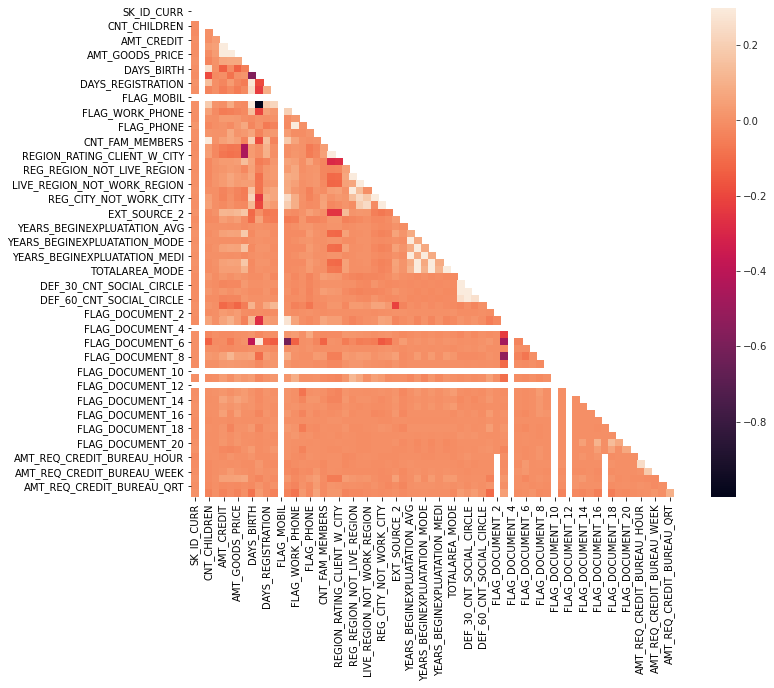

In [140]:
corr = sep_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

### Find top 10 correlation -  Client without Payment Difficulties


In [141]:
sep_0.corr().abs()

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000     NaN      0.000716   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                  0.000716     NaN      1.000000   
AMT_INCOME_TOTAL              0.001739     NaN      0.027397   
AMT_CREDIT                    0.000342     NaN      0.003081   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.001725     NaN      0.000648   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002524     NaN      0.001632   
AMT_REQ_CREDIT_BUREAU_MON     0.000054     NaN      0.010455   
AMT_REQ_CREDIT_BUREAU_QRT     0.001148     NaN      0.007087   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004349     NaN      0.042547   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.001739    0.000342     0.000068   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN                        0.027397    0.003081     0.020905   
AMT_INCOME_TOTAL                    1.000000    0.342799     0.418953   
AMT_CREDIT                          0.342799    1.000000     0.771309   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.007862    0.004409     0.002392   
AMT_REQ_CREDIT_BUREAU_WEEK          0.006234    0.001883     0.012681   
AMT_REQ_CREDIT_BUREAU_MON           0.061470    0.054071     0.038181   
AMT_REQ_CREDIT_BUREAU_QRT           0.013128    0.017767     0.011248   
AMT_REQ_CREDIT_BUREAU_YEAR          0.029536    0.048866     0.010882   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         0.000205                    0.000360   
TARGET                                  NaN                         NaN   
CNT_CHILDREN                       0.000525                    0.024363   
AMT_INCOME_TOTAL                   0.349462                    0.167851   
AMT_CREDIT                         0.987250                    0.100604   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004820                    0.001969   
AMT_REQ_CREDIT_BUREAU_WEEK         0.001597                    0.002480   
AMT_REQ_CREDIT_BUREAU_MON          0.055850                    0.078629   
AMT_REQ_CREDIT_BUREAU_QRT          0.018163                    0.001013   
AMT_REQ_CREDIT_BUREAU_YEAR         0.051266                    0.001775   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                    0.001346       0.001744  ...          0.001194   
TARGET                             NaN            NaN  ...               NaN   
CNT_CHILDREN                  0.336966       0.243356  ...          0.004181   
AMT_INCOME_TOTAL              0.062609       0.141250  ...          0.008214   
AMT_CREDIT                    0.047378       0.072515  ...          0.035527   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002772       0.000802  ...          0.013823   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001069       0.002304  ...          0.004443   
AMT_REQ_CREDIT_BUREAU_MON     0.002855       0.035564  ...          0.002460   
AMT_REQ_CREDIT_BUREAU_QRT     0.011335       0.015288  ...          0.005158   
AMT_REQ_CREDIT_BUREAU_YEAR    0.072886       0.052148  ...          0.047097   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000676          0.000832   
TARGET                                   NaN               NaN   
CNT_CHILDREN                        0.001078          0.001302   
AMT_INCOME_TOTAL                    0.005762          0.000840   
AMT_CREDIT                          0.021560          0.032151   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.001341          0.00

In [142]:
sep_0.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                             NaN
                            CNT_CHILDREN                  0.000716
                            AMT_INCOME_TOTAL              0.001739
                            AMT_CREDIT                    0.000342
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.003798
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.019085
                            AMT_REQ_CREDIT_BUREAU_MON     0.004889
                            AMT_REQ_CREDIT_BUREAU_QRT     0.074664
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4624, dtype: float64

In [143]:
sep_0.corr().abs().unstack().sort_values(kind='quicksort')

FLAG_DOCUMENT_2               EXT_SOURCE_2        0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2     0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL          0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12    0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4     0.000008
                                                    ...   
AMT_REQ_CREDIT_BUREAU_QRT     FLAG_MOBIL               NaN
                              FLAG_DOCUMENT_2          NaN
AMT_REQ_CREDIT_BUREAU_YEAR    TARGET                   NaN
                              FLAG_MOBIL               NaN
                              FLAG_DOCUMENT_2          NaN
Length: 4624, dtype: float64

In [144]:
sep_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()

FLAG_DOCUMENT_2               EXT_SOURCE_2                  0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2               0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL                    0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12              0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4               0.000008
                                                              ...   
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE      1.000000
TOTALAREA_MODE                TOTALAREA_MODE                1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                1.000000
FLAG_DOCUMENT_9               FLAG_DOCUMENT_9               1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4461, dtype: float64

In [145]:
correlation_0 = sep_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

FLAG_DOCUMENT_2               EXT_SOURCE_2                  0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2               0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL                    0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12              0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4               0.000008
                                                              ...   
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE      1.000000
TOTALAREA_MODE                TOTALAREA_MODE                1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                1.000000
FLAG_DOCUMENT_9               FLAG_DOCUMENT_9               1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4461, dtype: float64

In [146]:
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0

FLAG_DOCUMENT_2               EXT_SOURCE_2                0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2             0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL                  0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12            0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4             0.000008
                                                            ...   
FLOORSMAX_MEDI                FLOORSMAX_AVG               0.997019
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE    0.998508
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE    0.998508
DAYS_EMPLOYED                 FLAG_EMP_PHONE              0.999758
FLAG_EMP_PHONE                DAYS_EMPLOYED               0.999758
Length: 4394, dtype: float64

In [147]:
correlation_0.tail(10)

FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988153
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997019
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997019
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998508
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998508
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999758
dtype: float64

### do the same for sep_1 -  Client with Payment Difficulties


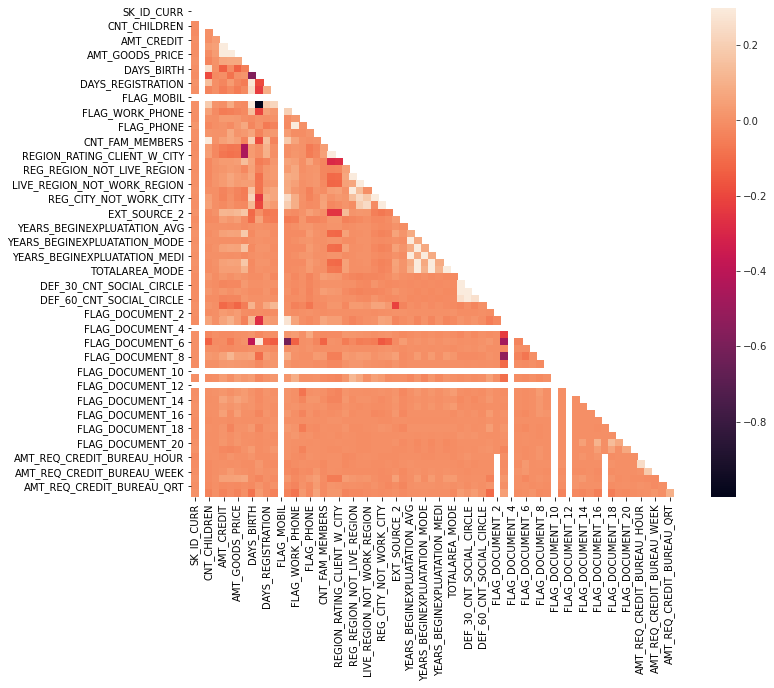

In [148]:

corr = sep_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True);

In [149]:
correlation_1 = sep_1.corr().abs()

In [150]:
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0 ]
print(correlation_1.tail(10))

FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989370
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989370
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996125
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996125
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997233
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997233
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998269
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998269
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999702
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
dtype: float64


### Check the outliers

In [151]:
train_numerical = app_data.select_dtypes(include=['int64','float64']).columns
train_numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [152]:
app_data.index

RangeIndex(start=0, stop=307511, step=1)

### Univariate Analysis


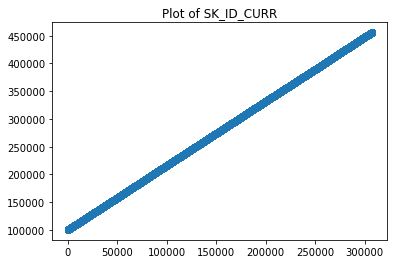

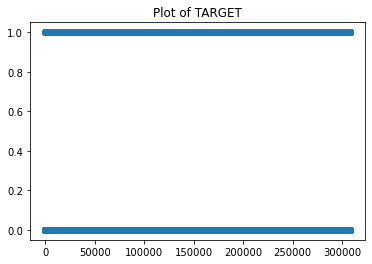

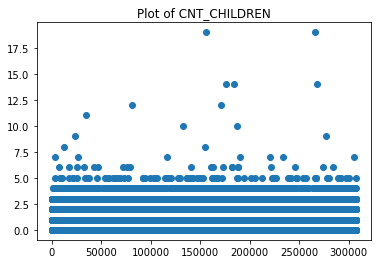

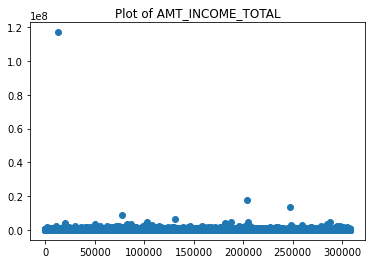

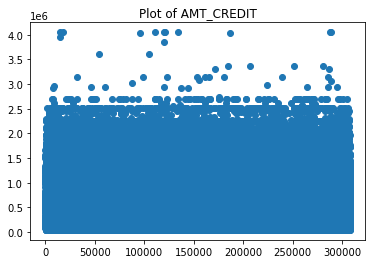

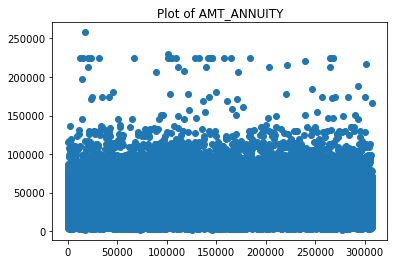

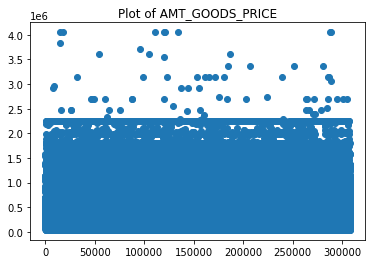

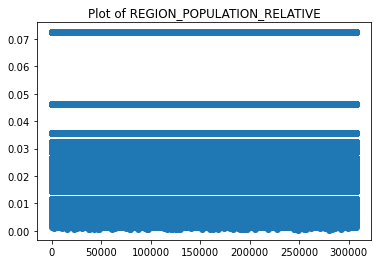

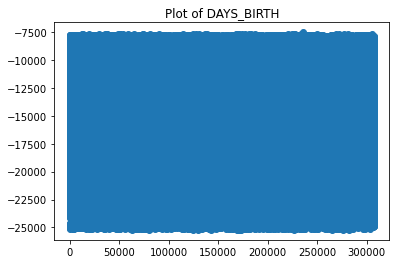

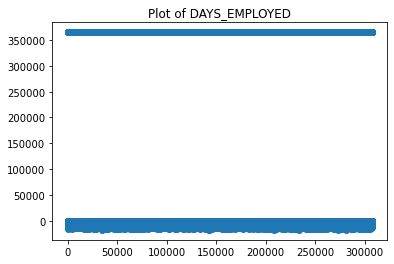

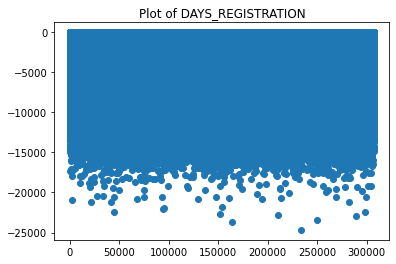

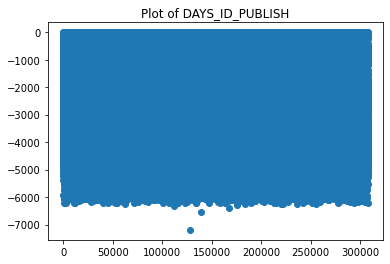

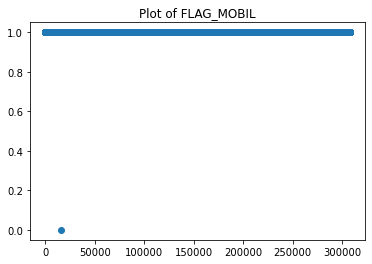

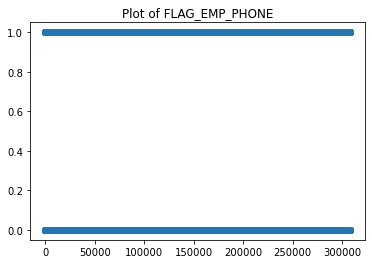

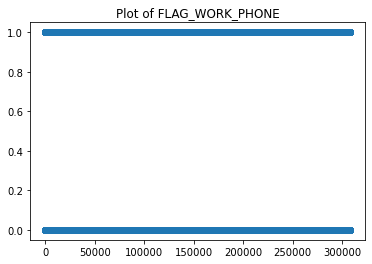

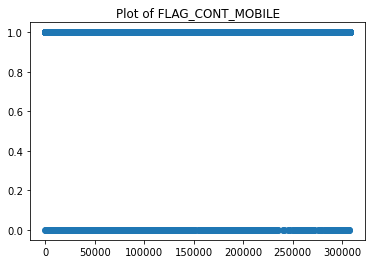

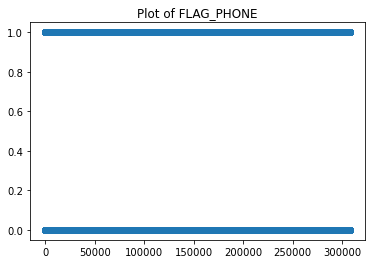

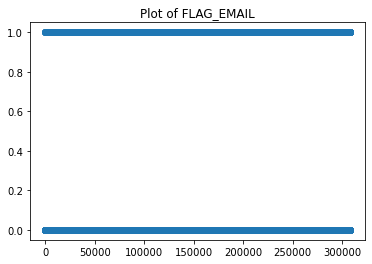

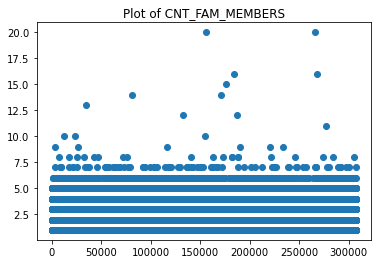

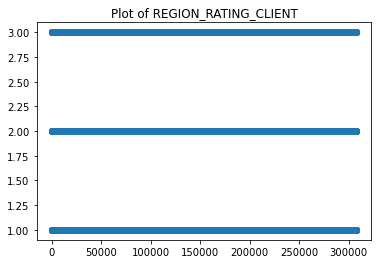

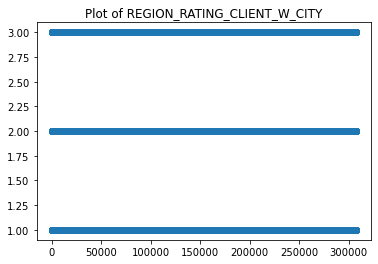

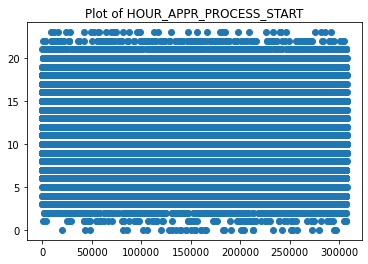

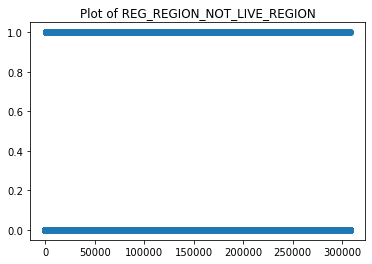

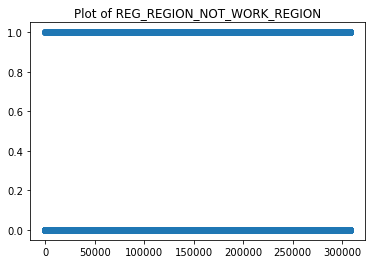

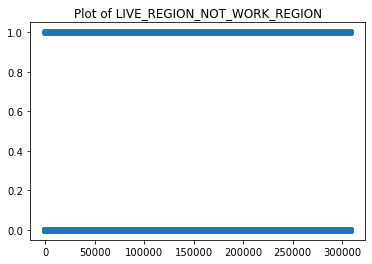

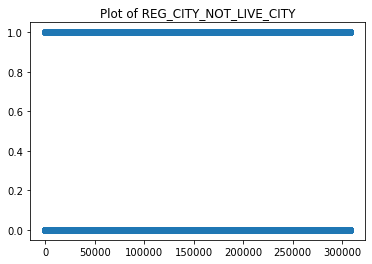

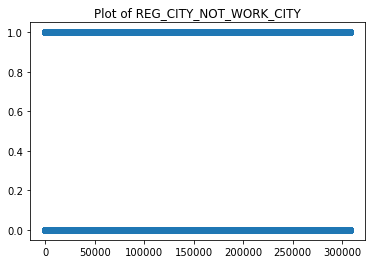

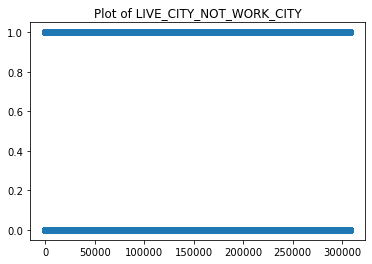

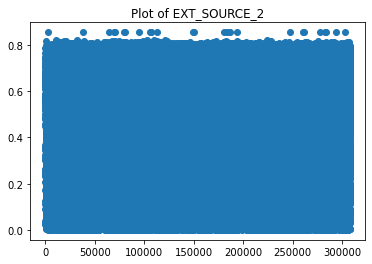

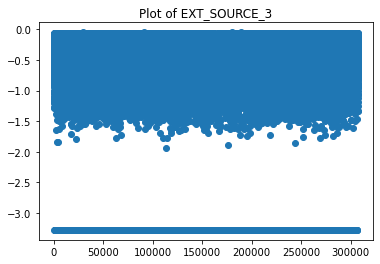

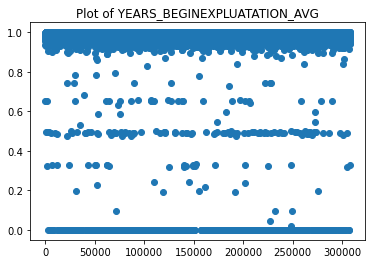

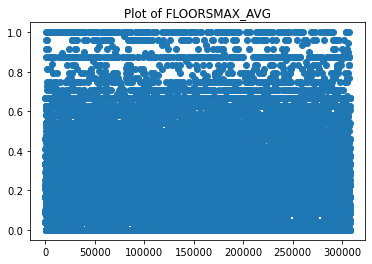

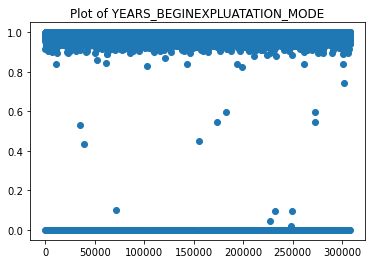

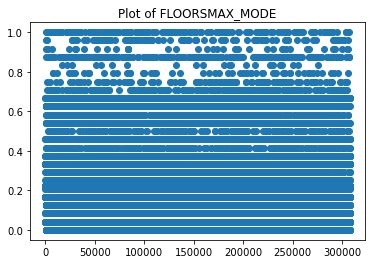

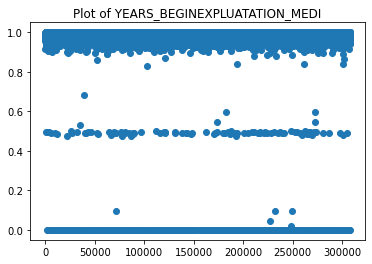

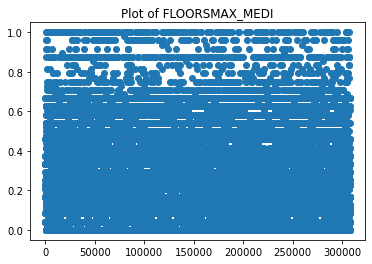

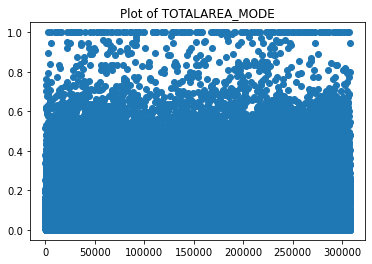

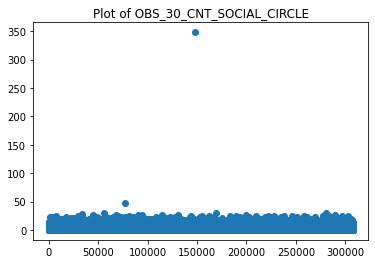

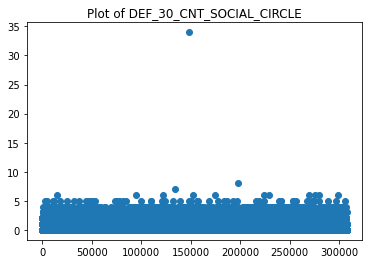

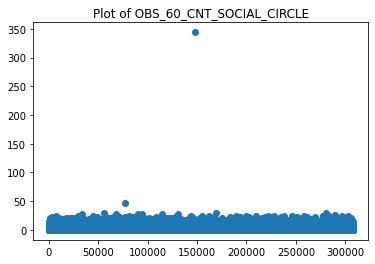

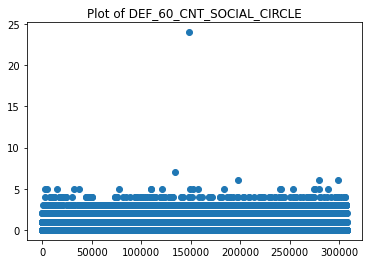

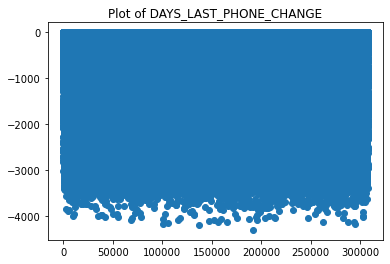

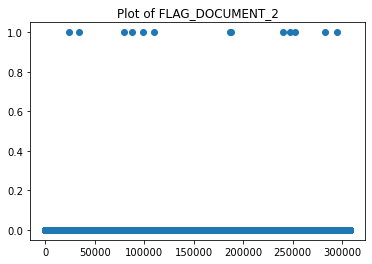

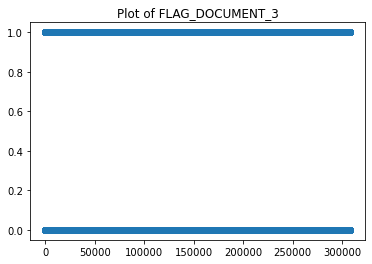

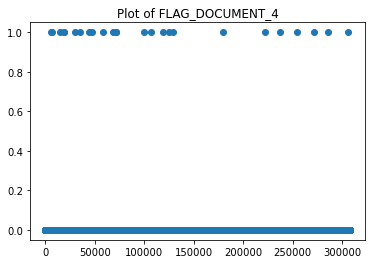

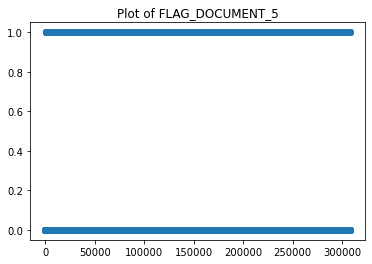

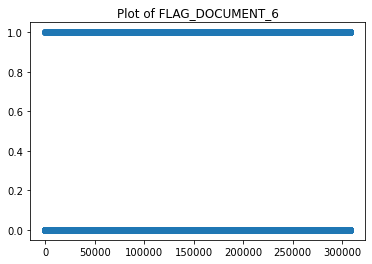

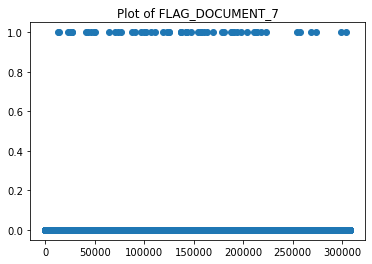

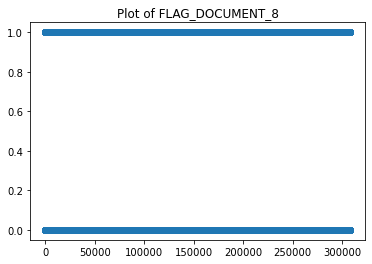

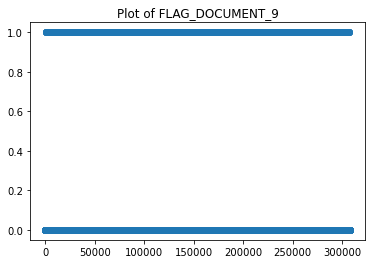

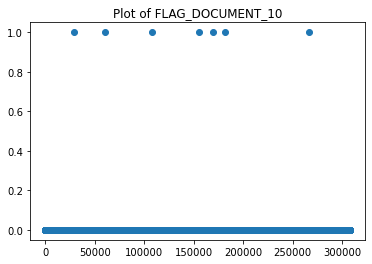

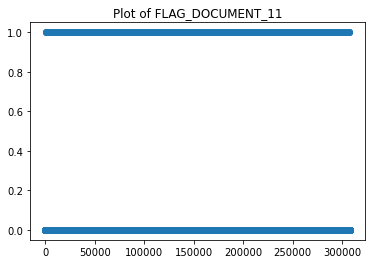

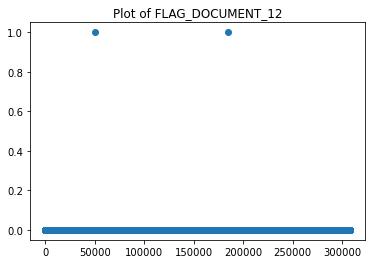

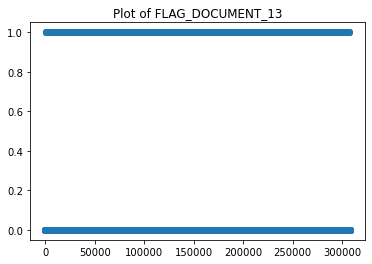

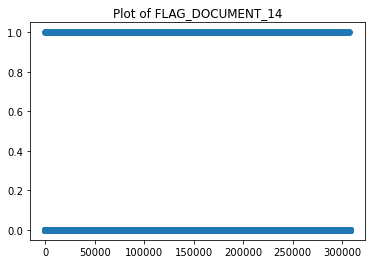

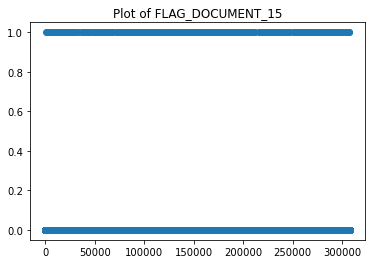

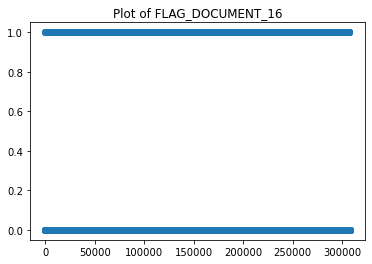

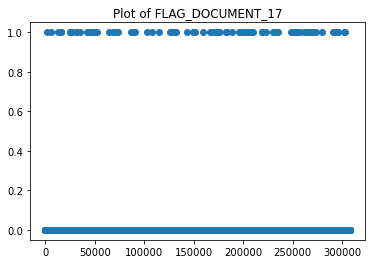

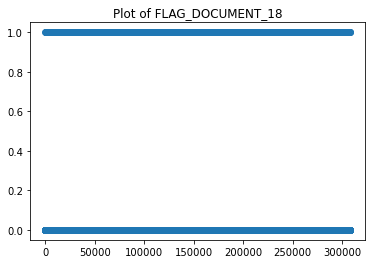

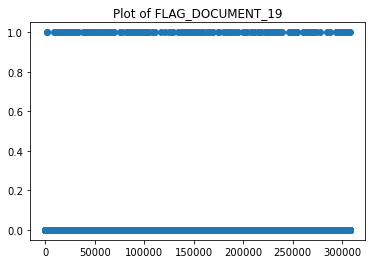

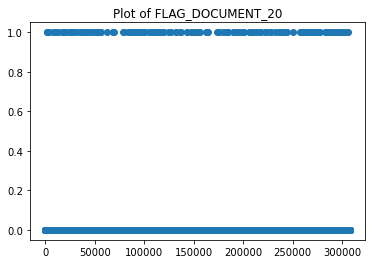

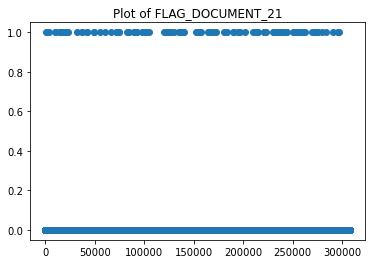

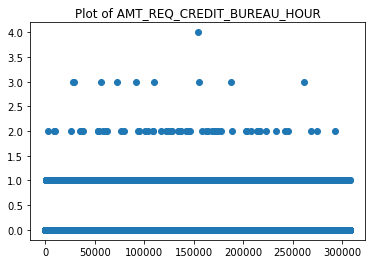

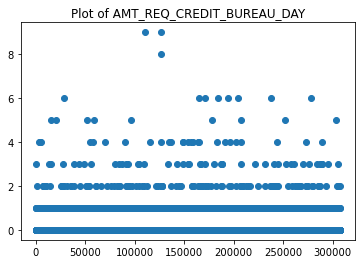

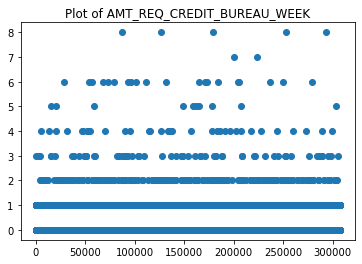

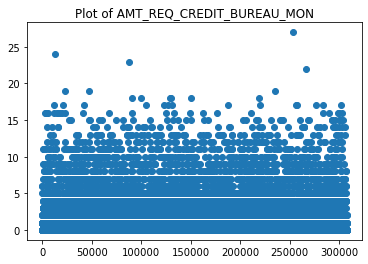

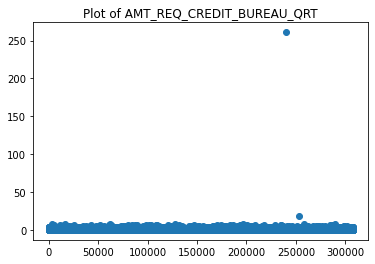

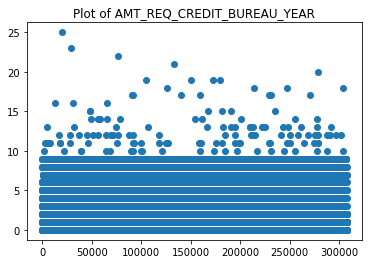

In [153]:
for column in train_numerical:
    plt.scatter(app_data.index, app_data[column])
    plt.title("Plot of "+column)
    plt.show()

## Bi Variate Analysis

In [154]:
prev_app = pd.read_csv('previous_application.csv')

In [155]:
print('Prev Size: ')
print(prev_app.shape)
print('Curr Size: ')
print(app_data.shape)

Prev Size: 
(1670214, 37)
Curr Size: 
(307511, 81)


In [156]:
prev_app = prev_app.sample(frac = 0.5)
print('Size: ')
print(prev_app.shape)

Size: 
(835107, 37)


In [157]:
print(prev_app.SK_ID_PREV.value_counts().unique)
print(app_data.SK_ID_CURR.value_counts().unique)

<bound method Series.unique of 2109434    1
1686114    1
1639029    1
1641076    1
1651315    1
          ..
1501303    1
1499254    1
1503348    1
1493107    1
2097152    1
Name: SK_ID_PREV, Length: 835107, dtype: int64>
<bound method Series.unique of 100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64>


#### Length of previous application is 1670214, while length of current application is 338857, clearly there are diplicates(SK_ID_PREV) in the Previous file

In [158]:
for column in prev_app:
    if prev_app[column].isna().any():
        print('{0} has {1} missing values'.format(column, prev_app[column].isna().sum()))

AMT_ANNUITY has 186054 missing values
AMT_CREDIT has 1 missing values
AMT_DOWN_PAYMENT has 447595 missing values
AMT_GOODS_PRICE has 192648 missing values
RATE_DOWN_PAYMENT has 447595 missing values
RATE_INTEREST_PRIMARY has 832118 missing values
RATE_INTEREST_PRIVILEGED has 832118 missing values
NAME_TYPE_SUITE has 409752 missing values
CNT_PAYMENT has 186051 missing values
PRODUCT_COMBINATION has 177 missing values
DAYS_FIRST_DRAWING has 336681 missing values
DAYS_FIRST_DUE has 336681 missing values
DAYS_LAST_DUE_1ST_VERSION has 336681 missing values
DAYS_LAST_DUE has 336681 missing values
DAYS_TERMINATION has 336681 missing values
NFLAG_INSURED_ON_APPROVAL has 336681 missing values


In [159]:
prev_app.describe()


SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  8.351070e+05  835107.000000  649053.000000     8.351070e+05   
mean   1.923054e+06  278325.935957   15952.805919     1.754184e+05   
std    5.329055e+05  102852.761474   14789.897328     2.934163e+05   
min    1.000002e+06  100003.000000       0.000000     0.000000e+00   
25%    1.461347e+06  189283.500000    6320.835000     1.876500e+04   
50%    1.923135e+06  278728.000000   11250.000000     7.087050e+04   
75%    2.384878e+06  367523.000000   20662.875000     1.803600e+05   
max    2.845382e+06  456255.000000  418058.145000     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  8.351060e+05      3.875120e+05     6.424590e+05   
mean   1.963064e+05      6.704898e+03     2.280519e+05   
std    3.191077e+05      2.169892e+04     3.161148e+05   
min    0.000000e+00      0.000000e+00     0.000000e+00   
25%    2.416950e+04      0.000000e+00     5.080590e+04   
50%    8.044650e+04      1.641690e+03     1.121369e+05   
75%    2.164185e+05      7.708500e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count            835107.000000           835107.000000      387512.000000   
mean                 12.484145                0.996447           0.079671   
std                   3.332671                0.059500           0.107948   
min                   0.000000                0.000000           0.000000   
25%                  10.000000                1.000000           0.000000   
50%                  12.000000                1.000000           0.051654   
75%                  15.000000                1.000000           0.108909   
max                  23.000000                1.000000           0.980715   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               2989.000000  835107.000000      8.351070e+05   
mean   ...                  0.770938    -881.535216      3.086822e+02   
std    ...                  0.100740     779.582152      6.399842e+03   
min    ...                  0.424419   -2922.000000     -1.000000e+00   
25%    ...                  0.715645   -1303.000000     -1.000000e+00   
50%    ...                  0.835095    -582.000000      3.000000e+00   
75%    ...                  0.852537    -280.000000      8.200000e+01   
max    ...                  0.867336      -1.000000      4.000000e+06   

         CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  649056.000000       498426.000000   498426.000000   
mean       16.078214       342199.512578    13667.350686   
std        14.586541        88935.138198    72078.023797   
min         0.000000        -2922.000000    -2892.000000   
25%         6.000000       365243.000000    -1632.000000   
50%        12.000000       365243.000000     -833.000000   
75%        24.000000       365243.000000     -412.000000   
max        84.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              498426.000000  498426.000000     498426.000000   
mean                33707.731641   76493.364084      81948.856450   
std                106775.808392  149585.672980     153276.346198   
min                 -2801.000000   -2888.000000      -2874.000000   
25%                 -1244.000000   -1316.000000      -1271.000000   
50%                  -362.000000    -540.000000       -500.000000   
75%                   128.000000     -75.000000        -45.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              498426.000000  
mean                    0.332567  
std                     0.471133  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [160]:
prev_app.isna().sum().sort_values(ascending = False).head(60)

RATE_INTEREST_PRIVILEGED       832118
RATE_INTEREST_PRIMARY          832118
RATE_DOWN_PAYMENT              447595
AMT_DOWN_PAYMENT               447595
NAME_TYPE_SUITE                409752
DAYS_TERMINATION               336681
NFLAG_INSURED_ON_APPROVAL      336681
DAYS_FIRST_DRAWING             336681
DAYS_FIRST_DUE                 336681
DAYS_LAST_DUE_1ST_VERSION      336681
DAYS_LAST_DUE                  336681
AMT_GOODS_PRICE                192648
AMT_ANNUITY                    186054
CNT_PAYMENT                    186051
PRODUCT_COMBINATION               177
AMT_CREDIT                          1
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
AMT_APPLICATION                     0
NAME_PAYMENT_TYPE                   0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISIO

In [161]:
x = len(prev_app)/2
x

417553.5

In [162]:
# Check how many columns are having less than 50% of missing values
len(prev_app.columns[prev_app.isnull().sum() < x])

33

In [163]:
prev_app = prev_app[prev_app.columns[prev_app.isnull().sum() < x]]

In [164]:
# Let's see the size after removing the columns
prev_app.shape

(835107, 33)

In [165]:
#sorting by missing values again:
prev_app.isna().sum().sort_values(ascending=False).head(40)

NAME_TYPE_SUITE                409752
DAYS_FIRST_DUE                 336681
DAYS_TERMINATION               336681
DAYS_FIRST_DRAWING             336681
NFLAG_INSURED_ON_APPROVAL      336681
DAYS_LAST_DUE_1ST_VERSION      336681
DAYS_LAST_DUE                  336681
AMT_GOODS_PRICE                192648
AMT_ANNUITY                    186054
CNT_PAYMENT                    186051
PRODUCT_COMBINATION               177
AMT_CREDIT                          1
NAME_CASH_LOAN_PURPOSE              0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
DAYS_DECISION                       0
NAME_CONTRACT_STATUS                0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOL

In [166]:
list(set(prev_app.columns) - set(prev_app.describe().columns))

['NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'NAME_GOODS_CATEGORY',
 'NAME_CASH_LOAN_PURPOSE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_TYPE_SUITE',
 'CHANNEL_TYPE',
 'CODE_REJECT_REASON',
 'PRODUCT_COMBINATION',
 'NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [167]:
# Creating a new df with columns which are having missing values:
nulls = prev_app.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)

NAME_TYPE_SUITE              409752
NFLAG_INSURED_ON_APPROVAL    336681
DAYS_TERMINATION             336681
DAYS_LAST_DUE                336681
DAYS_LAST_DUE_1ST_VERSION    336681
DAYS_FIRST_DUE               336681
DAYS_FIRST_DRAWING           336681
AMT_GOODS_PRICE              192648
AMT_ANNUITY                  186054
CNT_PAYMENT                  186051
PRODUCT_COMBINATION             177
AMT_CREDIT                        1
dtype: int64

In [168]:
len(nulls)

33

In [169]:
prev_app.count()

SK_ID_PREV                     835107
SK_ID_CURR                     835107
NAME_CONTRACT_TYPE             835107
AMT_ANNUITY                    649053
AMT_APPLICATION                835107
AMT_CREDIT                     835106
AMT_GOODS_PRICE                642459
WEEKDAY_APPR_PROCESS_START     835107
HOUR_APPR_PROCESS_START        835107
FLAG_LAST_APPL_PER_CONTRACT    835107
NFLAG_LAST_APPL_IN_DAY         835107
NAME_CASH_LOAN_PURPOSE         835107
NAME_CONTRACT_STATUS           835107
DAYS_DECISION                  835107
NAME_PAYMENT_TYPE              835107
CODE_REJECT_REASON             835107
NAME_TYPE_SUITE                425355
NAME_CLIENT_TYPE               835107
NAME_GOODS_CATEGORY            835107
NAME_PORTFOLIO                 835107
NAME_PRODUCT_TYPE              835107
CHANNEL_TYPE                   835107
SELLERPLACE_AREA               835107
NAME_SELLER_INDUSTRY           835107
CNT_PAYMENT                    649056
NAME_YIELD_GROUP               835107
PRODUCT_COMB

In [170]:
data_missing = prev_app.count() / len(prev_app)
data_missing = (1 - data_missing)*100

In [171]:
data_missing  = round(data_missing, 2)
data_missing.sort_values(ascending = False, inplace=True)
data_missing.head(50)

NAME_TYPE_SUITE                49.07
DAYS_FIRST_DUE                 40.32
DAYS_TERMINATION               40.32
DAYS_FIRST_DRAWING             40.32
NFLAG_INSURED_ON_APPROVAL      40.32
DAYS_LAST_DUE_1ST_VERSION      40.32
DAYS_LAST_DUE                  40.32
AMT_GOODS_PRICE                23.07
CNT_PAYMENT                    22.28
AMT_ANNUITY                    22.28
PRODUCT_COMBINATION             0.02
NAME_CASH_LOAN_PURPOSE          0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
N

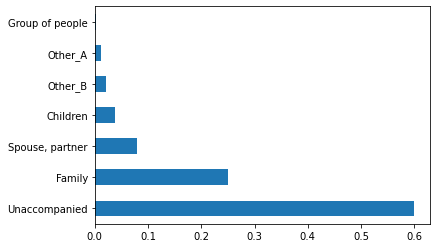

In [172]:
prev_app.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.show()

In [173]:
# This compound is related to who accompanied client when applying for the previous application.
# It is not a releavant data.
# This column can be dropped.
# The following code can be applied for that:
prev_app.drop('NAME_TYPE_SUITE', axis=1, inplace=True)
prev_app.shape

(835107, 32)

In [174]:
prev_app['DAYS_FIRST_DUE'].mean()

13667.3506859594

In [175]:
prev_app['DAYS_FIRST_DUE'].mode()

0    365243.0
dtype: float64

In [176]:
prev_app['DAYS_FIRST_DUE'].describe()

count    498426.000000
mean      13667.350686
std       72078.023797
min       -2892.000000
25%       -1632.000000
50%        -833.000000
75%        -412.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

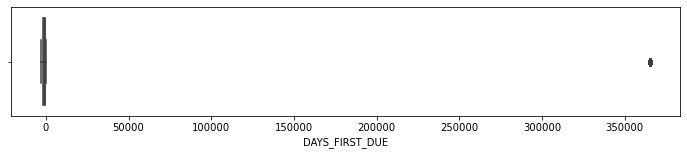

In [177]:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.DAYS_FIRST_DUE)
plt.show()

In [178]:
# As we can see, there is an outlier in this column. 
# To remove the outlier we can do the follwing:
prev_app = prev_app[prev_app.DAYS_FIRST_DUE < 365243.0]

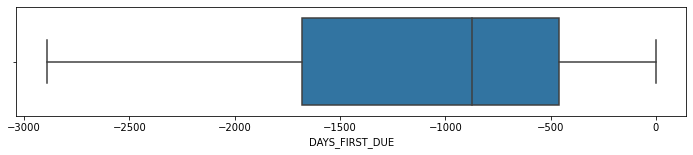

In [179]:
plt.figure(figsize=[12,2]) 
sns.boxplot(prev_app.DAYS_FIRST_DUE) 
plt.show()

In [180]:
# Check the Mean, Median and Mode after:
print("Mean: " , prev_app['DAYS_FIRST_DUE'].mean())
print("Median: " , prev_app['DAYS_FIRST_DUE'].median())
print("Mode: ", prev_app['DAYS_FIRST_DUE'].mode())

Mean:  -1107.9348997750478
Median:  -876.0
Mode:  0   -334.0
dtype: float64


In [181]:
prev_app['DAYS_FIRST_DUE'].fillna(prev_app['DAYS_FIRST_DUE'].mean(), inplace = True)

In [182]:
# looking for null values once again:
prev_app['DAYS_FIRST_DUE'].isna().sum()

0

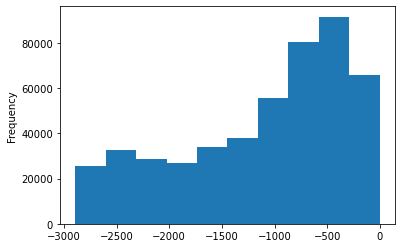

In [183]:
prev_app['DAYS_FIRST_DUE'].plot.hist()
plt.show()

In [184]:
prev_app.DAYS_TERMINATION.describe()

count    478324.000000
mean      71943.171137
std      146254.074846
min       -2874.000000
25%       -1318.000000
50%        -547.000000
75%         -93.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

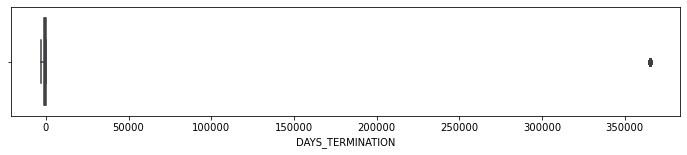

In [185]:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.DAYS_TERMINATION)
plt.show()

In [186]:
prev_app = prev_app[prev_app.DAYS_TERMINATION < 365243.00]

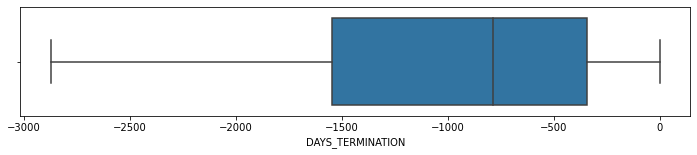

In [187]:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.DAYS_TERMINATION)
plt.show()

In [188]:
print("Mean: " , prev_app['DAYS_TERMINATION'].mean())
print("Median: " , prev_app['DAYS_TERMINATION'].median())
print("Mode: ", prev_app['DAYS_TERMINATION'].mode())

Mean:  -984.7976082950031
Median:  -789.0
Mode:  0   -233.0
dtype: float64


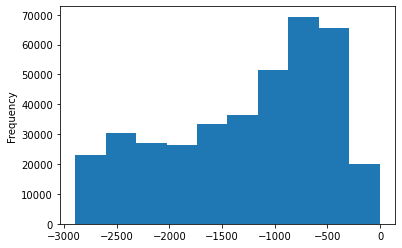

In [189]:
# And the histogram:
prev_app['DAYS_FIRST_DUE'].plot.hist()
plt.show()

In [190]:
# We can replace the missing values by mean.
# Below the suggested code:
prev_app['DAYS_FIRST_DUE'].fillna(prev_app['DAYS_FIRST_DUE'].mean(), inplace = True)

In [191]:
# looking for null values once again:
prev_app['DAYS_FIRST_DUE'].isna().sum()

0

In [192]:
prev_app.DAYS_FIRST_DRAWING.head()

1344381    365243.0
581520      -1967.0
1249244    365243.0
437544     365243.0
155376     365243.0
Name: DAYS_FIRST_DRAWING, dtype: float64

In [193]:
prev_app.DAYS_FIRST_DRAWING.describe()

count    383074.000000
mean     361507.086380
std       36822.828656
min       -2919.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

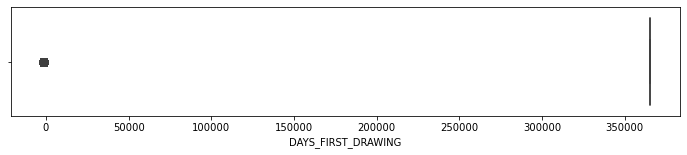

In [194]:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.DAYS_FIRST_DRAWING)
plt.show()

In [195]:
prev_app = prev_app[prev_app.DAYS_FIRST_DRAWING > 0]

In [196]:
prev_app.DAYS_FIRST_DRAWING.value_counts()

365243.0    379171
Name: DAYS_FIRST_DRAWING, dtype: int64

In [197]:
# In this case, we can replace the missing values be 365243
# Below the suggested code:
prev_app['DAYS_FIRST_DRAWING'].fillna(prev_app['DAYS_FIRST_DRAWING'].mean(), inplace = True)
# looking for null values once again:
prev_app['DAYS_FIRST_DRAWING'].isna().sum()

0

In [198]:
# Inspecting the column NFLAG_INSURED_ON_APPROVAL (Did the client requested insurance during the previous application):
prev_app.NFLAG_INSURED_ON_APPROVAL.head()

1344381    0.0
1249244    1.0
437544     0.0
155376     1.0
1319522    0.0
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

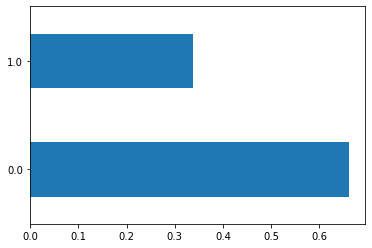

In [199]:
prev_app.NFLAG_INSURED_ON_APPROVAL.value_counts(normalize=True).plot.barh()
plt.show()

In [200]:
# Inspecting the column DAYS_LAST_DUE_1ST_VERSION:
prev_app.DAYS_LAST_DUE_1ST_VERSION.head()

1344381   -1807.0
1249244     -93.0
437544     -691.0
155376    -1291.0
1319522   -1389.0
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [201]:
# Check the Mean, Median and Mode:
print("Mean: " , prev_app['DAYS_LAST_DUE_1ST_VERSION'].mean())
print("Median: " , prev_app['DAYS_LAST_DUE_1ST_VERSION'].median())
print("Mode: ", prev_app['DAYS_LAST_DUE_1ST_VERSION'].mode())

Mean:  -864.4422595609897
Median:  -711.0
Mode:  0   -12.0
dtype: float64


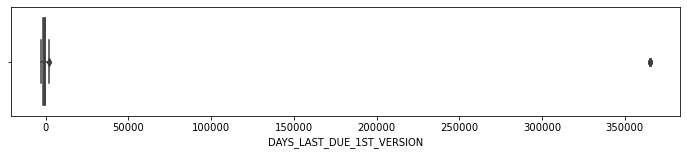

In [202]:
# Let's see the boxplot chart:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.DAYS_LAST_DUE_1ST_VERSION)
plt.show()

In [203]:
prev_app.DAYS_LAST_DUE_1ST_VERSION.describe()

count    379171.000000
mean       -864.442260
std        2309.907823
min       -2801.000000
25%       -1547.000000
50%        -711.000000
75%        -209.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [204]:
# Again, outlier need to be removed:
prev_app = prev_app[prev_app.DAYS_LAST_DUE_1ST_VERSION < 365243.0]

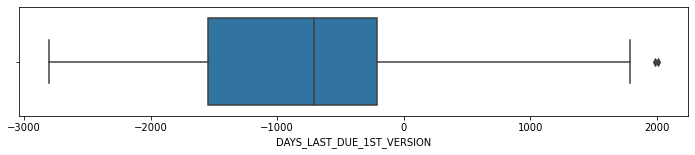

In [205]:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.DAYS_LAST_DUE_1ST_VERSION)
plt.show()

In [206]:
# Check the Mean, Median and Mode:
print("Mean: " , prev_app['DAYS_LAST_DUE_1ST_VERSION'].mean())
print("Median: " , prev_app['DAYS_LAST_DUE_1ST_VERSION'].median())
print("Mode: ", prev_app['DAYS_LAST_DUE_1ST_VERSION'].mode())

Mean:  -876.9948016394221
Median:  -711.0
Mode:  0   -12.0
dtype: float64


In [207]:
# Let's replace the missing values by mean
# Below the suggested code:
prev_app['DAYS_LAST_DUE_1ST_VERSION'].fillna(prev_app['DAYS_LAST_DUE_1ST_VERSION'].mean(), inplace = True)
# looking for null values once again:
prev_app['DAYS_LAST_DUE_1ST_VERSION'].isna().sum()

0

In [208]:
# Inspecting the column DAYS_LAST_DUE:
prev_app.DAYS_LAST_DUE.head()


1344381   -1807.0
1249244    -723.0
437544     -991.0
155376    -1441.0
1319522   -1389.0
Name: DAYS_LAST_DUE, dtype: float64

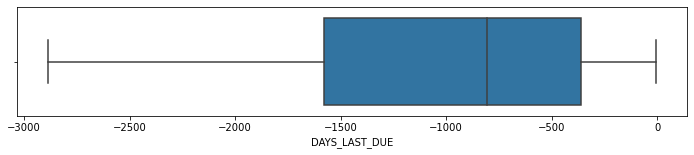

In [209]:
# Plotting a boxplot chart for better visualization:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.DAYS_LAST_DUE)
plt.show()

In [210]:
prev_app.DAYS_LAST_DUE.describe()


count    379158.000000
mean      -1003.445316
std         753.117227
min       -2888.000000
25%       -1577.000000
50%        -808.000000
75%        -359.000000
max          -3.000000
Name: DAYS_LAST_DUE, dtype: float64

In [211]:
# Same approacb to be applied as before:
prev_app = prev_app[prev_app.DAYS_LAST_DUE < 365243.0]

In [212]:
# Check the Mean, Median and Mode:
print("Mean: " , prev_app['DAYS_LAST_DUE'].mean())
print("Median: " , prev_app['DAYS_LAST_DUE'].median())
print("Mode: ", prev_app['DAYS_LAST_DUE'].mode())

Mean:  -1003.4453156731495
Median:  -808.0
Mode:  0   -271.0
dtype: float64


In [213]:
# Let's replace the missing values by mean
# Below the suggested code:
prev_app['DAYS_LAST_DUE'].fillna(prev_app['DAYS_LAST_DUE'].mean(), inplace = True)
# looking for null values once again:
prev_app['DAYS_LAST_DUE'].isna().sum()

0

In [214]:
# Inspecting the column AMT_GOODS_PRICE:
prev_app.AMT_GOODS_PRICE.head()

1344381    112500.0
1249244    900000.0
437544     270000.0
155376      67500.0
1319522     65250.0
Name: AMT_GOODS_PRICE, dtype: float64

In [215]:
# Check the Mean, Median and Mode:
print("Mean: " , prev_app['AMT_GOODS_PRICE'].mean())
print("Median: " , prev_app['AMT_GOODS_PRICE'].median())
print("Mode: ", prev_app['AMT_GOODS_PRICE'].mode())

Mean:  154420.82735014847
Median:  88200.0
Mode:  0    135000.0
dtype: float64


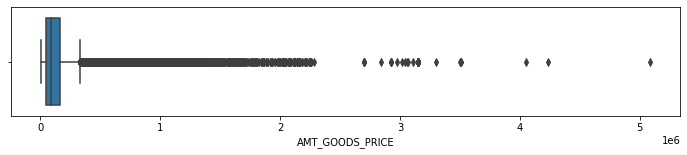

In [216]:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.AMT_GOODS_PRICE)
plt.show()

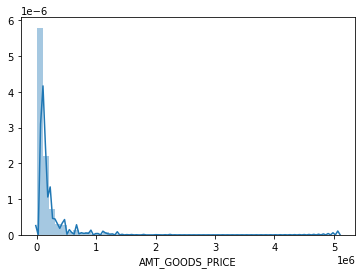

In [217]:
sns.distplot(prev_app['AMT_GOODS_PRICE'])

In [218]:
# I think we can replace the missing values by mean
# Below the suggested code:
prev_app['AMT_GOODS_PRICE'].fillna(prev_app['AMT_GOODS_PRICE'].mean(), inplace = True)
# looking for null values once again:
prev_app['AMT_GOODS_PRICE'].isna().sum()

0

In [219]:
# Inspecting the column CNT_PAYMENT:
prev_app.CNT_PAYMENT.head()

1344381    12.0
1249244    30.0
437544     12.0
155376     12.0
1319522    10.0
Name: CNT_PAYMENT, dtype: float64

In [220]:
prev_app.CNT_PAYMENT.describe()

count    379158.000000
mean         13.663188
std           9.561743
min           3.000000
25%           8.000000
50%          12.000000
75%          12.000000
max          72.000000
Name: CNT_PAYMENT, dtype: float64

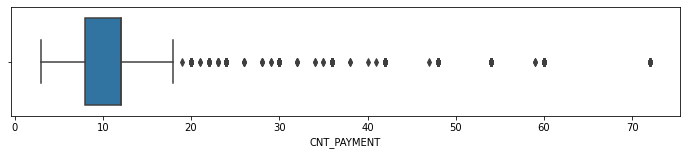

In [221]:
plt.figure(figsize=[12,2])
sns.boxplot(prev_app.CNT_PAYMENT)
plt.show()

In [222]:
# Check the Mean, Median and Mode:
print("Mean: " , prev_app['CNT_PAYMENT'].mean())
print("Median: " , prev_app['CNT_PAYMENT'].median())
print("Mode: ", prev_app['CNT_PAYMENT'].mode())

Mean:  13.663187905833452
Median:  12.0
Mode:  0    12.0
dtype: float64


In [223]:
# Let's replace the missing values by mean
# Below the suggested code:
prev_app['CNT_PAYMENT'].fillna(prev_app['CNT_PAYMENT'].mean(), inplace = True)
# looking for null values once again:
prev_app['CNT_PAYMENT'].isna().sum()

0

In [224]:
# Inspecting the column AMT_ANNUITY:
prev_app.AMT_ANNUITY.head()

1344381    12303.000
1249244    46177.200
437544     26978.400
155376      9165.825
1319522     7062.795
Name: AMT_ANNUITY, dtype: float64

In [225]:
prev_app.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  3.791580e+05  379158.000000  379155.000000     3.791580e+05   
mean   1.902846e+06  278087.602625   13934.094494     1.544208e+05   
std    5.361325e+05  102815.425952   13309.890946     2.153071e+05   
min    1.000002e+06  100003.000000     637.650000     5.400000e+03   
25%    1.434409e+06  189146.500000    5790.960000     4.500000e+04   
50%    1.895584e+06  278124.000000    9859.950000     8.820000e+04   
75%    2.369049e+06  367097.250000   16822.440000     1.593900e+05   
max    2.843499e+06  456255.000000  393868.665000     5.085000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  3.791580e+05     3.791580e+05            379158.000000   
mean   1.620709e+05     1.544208e+05                12.647123   
std    2.325861e+05     2.153071e+05                 3.316783   
min    5.139000e+03     5.400000e+03                 0.000000   
25%    4.341600e+04     4.500000e+04                10.000000   
50%    8.601300e+04     8.820000e+04                13.000000   
75%    1.674630e+05     1.593900e+05                15.000000   
max    4.050000e+06     5.085000e+06                23.000000   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  \
count           379158.000000  379158.000000      3.791580e+05  379158.000000   
mean                 0.999314   -1290.126217      4.698877e+02      13.663188   
std                  0.026178     759.459570      6.779502e+03       9.561743   
min                  0.000000   -2922.000000     -1.000000e+00       3.000000   
25%                  1.000000   -1881.000000      0.000000e+00       8.000000   
50%                  1.000000   -1096.000000      4.400000e+01      12.000000   
75%                  1.000000    -658.000000      2.060000e+02      12.000000   
max                  1.000000      -8.000000      4.000000e+06      72.000000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count            379158.0   379158.000000              379158.000000   
mean             365243.0    -1256.908162                -876.994802   
std                   0.0      758.715897                 860.295491   
min              365243.0    -2892.000000               -2801.000000   
25%              365243.0    -1846.000000               -1547.000000   
50%              365243.0    -1064.000000                -711.000000   
75%              365243.0     -625.000000                -209.000000   
max              365243.0       -5.000000                2011.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  379158.000000     379158.000000              379158.000000  
mean    -1003.445316       -992.455937                   0.338226  
std       753.117227        748.290398                   0.473106  
min     -2888.000000      -2874.000000                   0.000000  
25%     -1577.000000      -1557.000000                   0.000000  
50%      -808.000000       -799.000000                   0.000000  
75%      -359.000000       -352.000000                   1.000000  
max        -3.000000         -2.000000                   1.000000

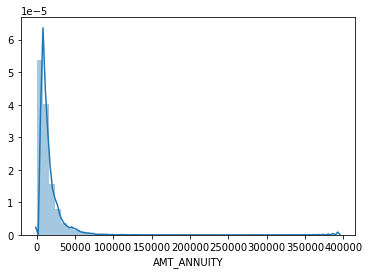

In [226]:
sns.distplot(prev_app['AMT_ANNUITY'])

In [227]:
# Let's replace the missing values by mean
# Below the suggested code:
prev_app['AMT_ANNUITY'].fillna(prev_app['AMT_ANNUITY'].mean(), inplace = True)
# looking for null values once again:
prev_app['AMT_ANNUITY'].isna().sum()

0

In [228]:
# And the last column to be inpected:
prev_app.PRODUCT_COMBINATION.head()

1344381              Cash Street: high
1249244               Cash X-Sell: low
437544             Cash X-Sell: middle
155376               Cash X-Sell: high
1319522    POS household with interest
Name: PRODUCT_COMBINATION, dtype: object

In [229]:
prev_app.PRODUCT_COMBINATION.value_counts()

POS household with interest       103214
POS mobile with interest           79705
Cash X-Sell: middle                42217
POS industry with interest         37267
POS household without interest     29572
Cash X-Sell: low                   19968
Cash X-Sell: high                  18940
Cash Street: high                  17668
POS other with interest             7884
POS mobile without interest         7875
Cash Street: middle                 7071
POS industry without interest       4313
Cash Street: low                    2834
POS others without interest          630
Name: PRODUCT_COMBINATION, dtype: int64

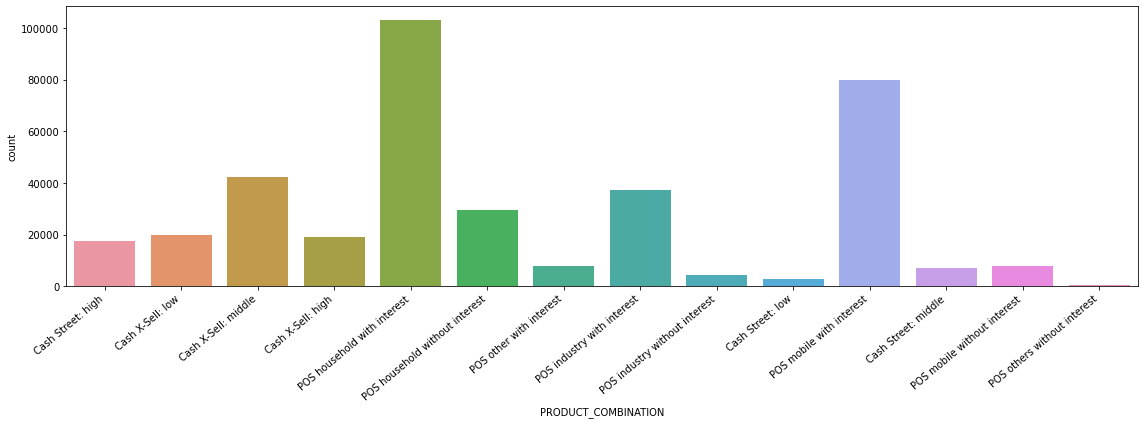

In [230]:
plt.figure(figsize=[16,6])
ax = sns.countplot(x = 'PRODUCT_COMBINATION', data = prev_app)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [231]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [232]:
prev_app = app_data.merge(prev_app,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')

In [233]:
pd.set_option("display.max_rows",112)
# prev_app.columns()

In [234]:
prev_app.OCCUPATION_TYPE

0          Core staff
1          Core staff
2            Laborers
3          Core staff
4            Laborers
             ...     
323784    Sales staff
323785            NaN
323786    Sales staff
323787            NaN
323788       Laborers
Name: OCCUPATION_TYPE, Length: 323789, dtype: object

In [235]:
sep_0 = app_data.loc[app_data['TARGET'] == 0]
sep_1 = app_data.loc[app_data['TARGET'] == 1]

In [236]:
prev_0 = prev_app.loc[prev_app['TARGET'] == 0]
prev_1 = prev_app.loc[prev_app['TARGET'] == 1]

In [237]:
def plotting(column,hue):
    
    col = column
    hue = hue    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    app_data[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((prev_0[col].value_counts())/len(sep_0))
    df['1']= ((prev_1[col].value_counts())/len(sep_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x = col, hue =hue, data = prev_0, ax = ax3)
    plt.xticks(rotation = 90)
    plt.title('Plotting data for target in terms of percentage')
    
    ax4 = plt.subplot(224)
    sns.countplot(x = col, hue =hue, data = prev_1, ax = ax4)
    plt.xticks(rotation = 90)
    plt.title('Plotting data for target=1 in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

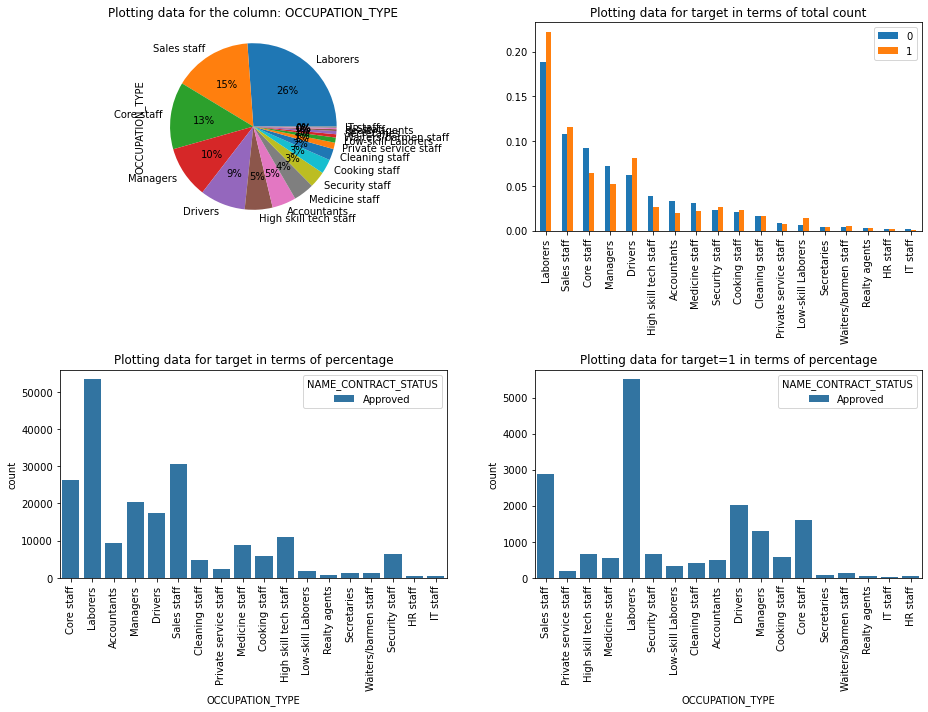

In [238]:
plotting("OCCUPATION_TYPE","NAME_CONTRACT_STATUS")

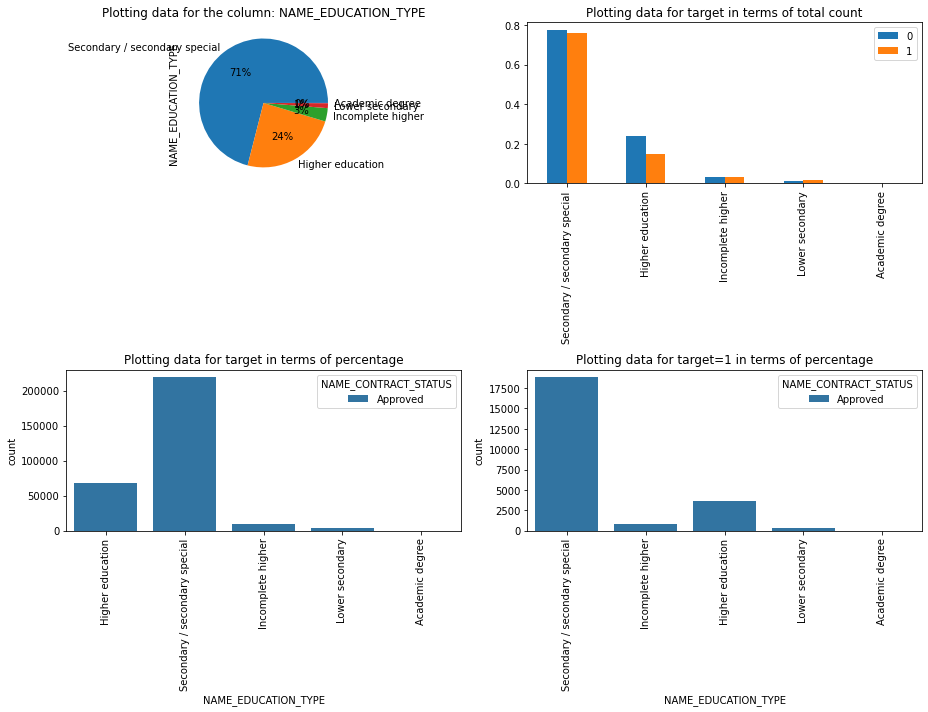

In [239]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')